<a target="_blank" href="https://colab.research.google.com/github/markusmeister/MIB-R/blob/master/python/Figures_Ch_11.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Ch 11 - Basics of Dynamical Systems

This notebook contains python code for generating figures in Chapter 11 of the book _Mathematics in Biology_.

## Imports and utilities

In [1]:
import numpy as np
from pathlib import Path
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.markers import MarkerStyle
import matplotlib.gridspec as gridspec


# set font to be used in figures
import matplotlib.font_manager as font_manager
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'serif'
cmfont = font_manager.FontProperties(fname=matplotlib.get_data_path() + '/fonts/ttf/cmr10.ttf')
matplotlib.rcParams['font.serif']=cmfont.get_name()
matplotlib.rcParams['axes.formatter.use_mathtext'] = True
matplotlib.rcParams['axes.unicode_minus']=False
matplotlib.rcParams['font.size'] = 11

datadir = Path('../data') # need to find a way to load data for execution in Colab!


Save = False # set to True if you are saving figures to a local drive
if Save:
    # set path to save the figures
    savedir = Path('../img')
    savedir.mkdir(parents=True, exist_ok=True)

In [ ]:
# Utilities for plotting

def plot(X, Y=None, xlabel=None, ylabel=None, legend=[], loc=None, title=None, alpha=1.0,
         xlim=None, ylim=None, xscale='linear', yscale='linear',
         xticks=None, yticks=None, xhide=False, yhide=False, yrot=False,
         xzero=False, yzero=False, yflip=False,
         fmts=['r-','g-','b-','y-','c-','m-'], linewidth=2, markersize=5, fillstyle='full',
         markeredgewidth=1, rasterized=False,
         grid=False, equal=False, figsize=(5,3), axes=None):
    """
    Plot data points.
    X: an array or list of arrays
    Y: an array or list of arrays
    If Y exists then those values are plotted vs the X values
    If Y doesn't exist the X values are plotted
    xlabel, ylabel: axis labels
    legend: list of labels for each Y series
    loc: location of the legend, like 'upper right'
    title: duh
    xlim, ylim: [low,high] list of limits for the 2 axes
    xscale, yscale: 'linear' or 'log'
    xticks, yticks: list of locations for tick marks, or None for auto ticks
    yhide: hide the y axis?
    yrot: rotate the yaxis label to horizontal?
    yzero: zero line for the y-axis?
    fmts: a list of format strings to be applied to successive Y-series
    linewidth, markersize, fillstyle, markeredgewidth: see docs
    grid: draw a grid?
    equal: use equal aspect ratio, i.e. same scale per unit on x and y axis?
    figsize: (h,v) in inches
    rasterized: rasterize the data portion of the graph?
    axes: pre-existing axes where to draw the plot
    Returns: axes for the plot
    """

    if not axes: # start a new figure
        fig = plt.figure(figsize=figsize)
        axes = plt.gca()

    def has_one_axis(X): # Return True if X (ndarray or list) has 1 axis
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    # axes.cla() # clears these axes
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt, linewidth=linewidth, markersize=markersize,
            	fillstyle=fillstyle,markeredgewidth=markeredgewidth,
            	rasterized=rasterized, alpha=alpha)
        else:
            axes.plot(y, fmt, linewidth=linewidth, markersize=markersize,
            	fillstyle=fillstyle,markeredgewidth=markeredgewidth,
            	rasterized=rasterized, alpha=alpha)
    set_axes(axes, xlabel, ylabel, legend, loc, xlim, ylim, xscale, yscale,
             xticks, yticks, xhide, yhide, yrot, xzero, yzero, yflip, grid, equal)
    if title:
        plt.title(title)
    plt.tight_layout()

    return axes # useful if we started a new figure

def hist(X, bins=50, range=None, density=None, weights=None, histtype='stepfilled', stacked=False,
         align='mid', color=['r','g','b','m'], alpha=0.5, linewidth=1,
         xlabel=None, ylabel=None, legend=[], loc=None, title=None,
         xlim=None, ylim=None, xscale='linear', yscale='linear',
         xticks=None, yticks=None, xhide=False, yhide=False, yrot=False,
         xzero=False, yzero=False, yflip=False,
         grid=False, figsize=(5,3), axes=None, orientation='vertical'):
    """
    Histogram data.
    X: an array or list of arrays to be histogrammed
    bins: the number of bins, or a list of edges
    range: [low,high] the range over which the bins are spread
    density: normalize to unit area?
    weights: array same shape as X; each value in X only contributes that weight.
    histtype: 'bar','barstacked','step','stepfilled'
    stacked: plot multiple series on top of each other?
    align: 'left','mid',right', center the bar on left edge, center, or right edge of bin
    color: list of colors for the data series
    alpha: opacity, useful if histtype='stepfilled'
    xlabel, ylabel: axis labels
    legend: list of labels for each Y series
    loc: location of the legend, like 'upper right'
    title: duh
    xlim, ylim: [low,high] list of limits for the 2 axes
    xscale, yscale: 'linear' or 'log'
    xticks, yticks: list of locations for tick marks, or None for auto ticks
    yhide: hide the y axis?
    yrot: rotate the yaxis label to horizontal?
    yzero: zero line for the y-axis?
    grid: draw a grid?
    figsize: (h,v) in inches
    axes: pre-existing axes where to draw the plot
    Returns: axes, n, bins, patches
    """

    if not axes: # start a new figure
        fig,ax = plt.subplots(figsize=figsize)
    else:
    	ax=axes

    def has_one_axis(X): # Return True if X (ndarray or list) has 1 axis
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list) and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        ndata=1
    else:
        ndata=len(X) # assuming it is an ndarray or a list of lists

    if len(color)<ndata: # if there aren't enough dolors provided
        col=None # use the default color sequence
    else:
        col=color[:ndata]

    if histtype=='step' or histtype=='stepfilled': # in these cases the legend sequence needs to be inverted for some reason
        if isinstance(legend, list):
        	legend = legend[-1::-1]

    n, bins, patches = ax.hist(X, bins=bins, range=range, density=density, weights=weights,
                               histtype=histtype, stacked=stacked, align=align,
                               color=col, alpha=alpha, linewidth=linewidth,
                               label=legend, orientation=orientation)

    set_axes(ax, xlabel, ylabel, legend, loc, xlim, ylim, xscale, yscale,
    	xticks, yticks, xhide, yhide, yrot, xzero, yzero, yflip, grid, equal=False)

    if title:
        plt.title(title)
    if not axes:
    	plt.tight_layout() # otherwise let the caller take care of layout

    return ax, n, bins, patches # useful if we started a new figure

def set_axes(axes, xlabel, ylabel, legend, loc, xlim, ylim, xscale, yscale,
    	xticks, yticks, xhide, yhide, yrot, xzero, yzero, yflip, grid, equal):
    """Set the axes for matplotlib."""
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    if xlim:
        axes.set_xlim(xlim)
    else:
        axes.set_xlim(auto=True)
    if ylim:
        axes.set_ylim(ylim)
    else:
        axes.set_ylim(auto=True)
    if grid:
        axes.grid()
    if equal:
        axes.set_aspect(aspect='equal')
    if ylabel:
        if yrot:
            axes.set_ylabel(ylabel, fontsize=12, rotation=0, labelpad=15)
        else:
            axes.set_ylabel(ylabel, fontsize=12)
    if xlabel:
        axes.set_xlabel(xlabel, fontsize=12)
    axes.get_yaxis().set_visible(not yhide)
    axes.get_xaxis().set_visible(not xhide)
    if xzero:
        axes.axvline(color='black', linewidth=0.5)
    if yzero:
        axes.axhline(color='black', linewidth=0.5)
    if yflip:
        axes.invert_yaxis()
    axes.tick_params(axis = 'both', which = 'major', labelsize = 10)
    axes.tick_params(axis = 'both', which = 'minor', labelsize = 9)
    if xticks != None:
        axes.set_xticks(xticks); # no minor ticks
    if yticks != None:
        axes.set_yticks(yticks); # no minor ticks
    if legend:
        axes.legend(legend, loc=loc)
    plt.draw()
    #     To change the font and control the fontsize, can use some of these commands:
    #     axes.set_xlabel(xlabel, fontname='Arial', fontsize = 12)
    #     axes.set_ylabel(ylabel, fontname='Arial', fontsize = 12)
    #     axes.tick_params(axis = 'both', which = 'major', labelsize = 10)
    #     axes.tick_params(axis = 'both', which = 'minor', labelsize = 9)
    #     plt.yticks(fontname = "Arial")
    #     plt.xticks(fontname = "Arial")
    #     if legend:
    #         axes.legend(legend, prop={"size":12, "family":'Arial'})
    #     For options on legend placement see https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

def test_plot():
    x = np.arange(-10,10,.01)
    t = [0.1,0.3,1,3,10]
    y = [np.exp(-x**2/(4*ti))/np.sqrt(4*np.pi*ti) for ti in t]
    plot (x,y,fmts=['r-','g-','b-','y-','c-','m-'],linewidth=1,
        xlabel='Distance',ylabel='Concentration',yzero=True,
        legend=['t=0.1','0.3','1','3','10'],xticks=[-10,-5,-1,0,1,5,10])

## What is a “dynamical system”?

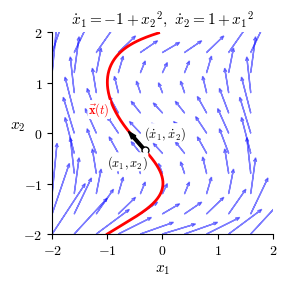

In [3]:

fig,ax = plt.subplots(figsize=(3,3))

# vector field
def V(x,y):
    vx=np.zeros(2)
    vx[0]=-1+y**2    
    vx[1]=1+x**2  
    return vx , np.sqrt(vx[0]**2+vx[1]**2)


# draw flow field
for i in range(10):
    for j in range(10):
        x=-2+i*0.4
        y=-2+j*0.4
        vx,l=V(x,y)
        L=5
        ax.arrow(x,y,vx[0]/L,vx[1]/L,width=0.001,length_includes_head=True,head_width=0.05,
                 overhang=0.5,color='blue', alpha=0.5)


# draw trajectory
Xs=np.zeros(300)
Ys=np.zeros(300)
Xs[0]=-1
Ys[0]=-2
for i in range(299):
    Xs[i+1]=Xs[i]+0.01*(Ys[i]**2 -1)
    Ys[i+1]=Ys[i]+0.01*(Xs[i]**2 +1)
ax.plot(Xs,Ys,linewidth=2,color='r',zorder=1)
ax.annotate(r'$\vec{\bf{x}}(t)$', 
            (Xs[200],Ys[200]), 
            textcoords="offset points", 
            xytext=(-14, 2.5), 
            ha='center',
            color="red",
            fontsize=9,
            bbox=dict(boxstyle="round,pad=0.05", edgecolor="none", facecolor="white"))


# draw the gradient
x=Xs[150]
y=Ys[150]
vx,l=V(x,y)
L=3
ax.arrow(x,y,vx[0]/L,vx[1]/L, width=0.05, length_includes_head=True, head_width=0.1,
         overhang=0, color='k',zorder=2
         )
ax.annotate(r'$(\dot{x}_1, \dot{x}_2)$', 
            (x,y), 
            textcoords="offset points", 
            xytext=(14.5, 10), 
            ha='center',
            fontsize=9,
            color="black",
            bbox=dict(boxstyle="round,pad=0.05", edgecolor="none", facecolor="white"))

# draw point
ax.plot(x,y,'o',markersize=5,color='k',markerfacecolor='white')
ax.annotate(r'$(x_1,x_2)$', (x, y), textcoords="offset points", xytext=(-12.6,-11), ha='center', fontsize=9,
                        bbox=dict(boxstyle="round,pad=0.05", edgecolor="none", facecolor="white"))

# hide the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# add title
ax.set_title(r'$\dot{x}_1 = \mathrm{-}1 + {x_2}^2, \,\, \dot{x}_2 = 1 + {x_1}^2$', fontsize=11)

# set labels
ax.set_xlabel('$x_1$', fontsize=11)
ax.set_ylabel('$x_2$', fontsize=11, rotation=0)

# set the range of the axes
ax.set_xlim([-2.0,1.7])
ax.set_ylim([-1.9,1.9])

# set the ticks
ax.set_xticks([-2, -1, 0, 1, 2])
ax.set_yticks([-2, -1, 0, 1, 2])
ax.set_xticklabels(['$-2$', '$-1$', '$0$', '$1$', '$2$'], fontsize=10)
ax.set_yticklabels(['$-2$', '$-1$', '$0$', '$1$', '$2$'], fontsize=10)

fig.tight_layout()

# save figure
if Save:
    fig.savefig(str(savedir / 'ch10_PhaseSpace.pdf'), dpi=600, format='pdf', bbox_inches='tight')
    fig.savefig(str(savedir / 'ch10_PhaseSpace.svg'), dpi=600, format='svg', bbox_inches='tight')

## Flows, fixed points, and bifurcations

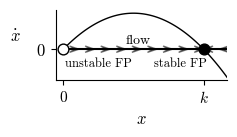

In [4]:
x=np.linspace(0,10.5,100)
R=1
K=9
y=R*x*(1-x/K)
fig, ax = plt.subplots(figsize=(2.5,1.5))
plot(x, y,
     xlim=(0,10.5), fmts=['k-'], xlabel=r'$x$', ylabel=r'$x$',
     axes=ax, linewidth=1, yrot=True);

ax.set_xlabel(r'$x$',fontsize=12);

ax.set_xticks([0,K]);
ax.set_xticklabels(['$0$','$k$'],fontsize=11)

ax.set_yticks([0])
ax.set_yticklabels(['$0$'],fontsize=12)

ax.set_ylabel(r'$\dot x$',fontsize=12)

ax.plot([0,11],[0,0],color='black')

ax.text(0.1,-1.1,r'unstable FP',fontsize=9,color='k')
ax.text(5.8,-1.1,r'stable FP',fontsize=9,color='k')
ax.text(4,0.3,r'flow',fontsize=10,color='black')

for i in range(9):
    ax.arrow(i,0,1,0,width=0.002,length_includes_head=True,head_width=0.4,
                overhang=0.5,color='black', alpha=0.5, zorder=1)
for i in range(2):
    ax.arrow(11-i,0,-1,0,width=0.002,length_includes_head=True,head_width=0.4,
                overhang=0.5,color='black', alpha=0.5, zorder=1)
    
ax.scatter(0,0,60,edgecolors='black',facecolors='white', zorder=2)
ax.scatter(9,0,60,'black', zorder=2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim([-0.5,10.5])

fig.tight_layout()
if Save:
    fig.savefig(str(savedir / 'ch10_FishFarm.pdf'), dpi=600, format='pdf', bbox_inches='tight')
    fig.savefig(str(savedir / 'ch10_FishFarm.svg'), dpi=600, format='svg', bbox_inches='tight')

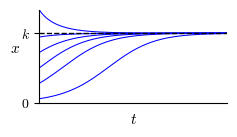

In [5]:
R=1
K=9
y=R*x*(1-x/K)

t=np.linspace(0,100,1000)
x=np.zeros((7,1000))
x[:,0]=[0.1,0.5,2.5,4.5,6.5,8.5,12]
for i in range(7):
    for j in range(999):
        x[i,j+1]=x[i,j]+0.1*R*x[i,j]*(1-x[i,j]/K)

fig, ax = plt.subplots(figsize=(2.5,1.5))

for i in range(6):
    ax.plot(t,x[i+1,:],'b', linewidth=0.75)

ax.plot([0,11],[K,K], color='k', linewidth=1, linestyle='dashed')

ax.set_xlabel(r'$t$',fontsize=11)
ax.set_xticks([])
ax.set_xlim((0,8))

ax.set_yticks([0,K])
ax.set_yticklabels([r'$0$',r'$k$'],fontsize=10)
ax.set_ylabel(r'$x$',fontsize=11, rotation=0)
ax.set_ylim((0,12))


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.tight_layout()
if Save:
    fig.savefig(str(savedir / 'ch10_FishFarmTrajectories.pdf'), dpi=600, format='pdf', bbox_inches='tight')
    fig.savefig(str(savedir / 'ch10_FishFarmTrajectories.svg'), dpi=600, format='svg', bbox_inches='tight')

/var/folders/yl/5q9cknc90hb_gxt6fwzjrl500000gn/T/ipykernel_20262/774094403.py:13: RuntimeWarning: overflow encountered in double_scalars
  x[i+1]=x[i]+0.1*(R*x[i]*(1-x[i]/K)-h[i])


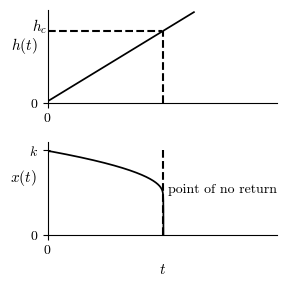

In [6]:
R=20
K=10
x=np.zeros(5000)
t=np.linspace(0,500,5000)
h=1+t/8
x[0]=K

h_c = R*K/4
x_c = K/2
t_c=8*(h_c-1)

for i in range(4999):
    x[i+1]=x[i]+0.1*(R*x[i]*(1-x[i]/K)-h[i])

xp = x[x>-np.inf]
hp = h[x>-np.inf]
tp = t[x>-np.inf]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(3,3))


axes[0].plot(t,h,'k', linewidth=1.25)

# axes[0].plot([(R*K/4-1)*8,(R*K/4-1)*8],[0,R*K/4],color='r', linestyle='dashed')
axes[0].plot([tp[np.argmin(np.abs(xp-0))],tp[np.argmin(np.abs(xp-0))]],[0,R*K/4],color='black', linestyle='dashed')

axes[0].plot([0,(R*K/4-1)*8],[R*K/4,R*K/4],color='black', linestyle='dashed')

axes[0].text(-54,R*K/4,r'$h_c$',fontsize=11,color='black')

axes[0].set_ylabel(r'$h(t)$',fontsize=11, rotation=0)
axes[0].set_yticks([-h_c, 0])
axes[0].set_yticklabels([r'$-h_\mathrm{c}$', r'$0$'],fontsize=10)
axes[0].set_ylim((0,1.3*(R*K/4)))
# axes[0].tick_params(axis='y', which='both', length=5, width=0.5, color='black', direction='out')


axes[0].set_xticks([0])
axes[0].set_xticklabels(['$0$'],fontsize=10)
axes[0].set_xlim((0,2*t_c))
# axes[0].set_yticks([0])
# axes[0].set_yticklabels([r'$0$'],fontsize=10)

axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

axes[1].plot(tp, xp, 'k-', linewidth=1.25, zorder=2)

axes[1].plot([tp[np.argmin(np.abs(xp-0))],tp[np.argmin(np.abs(xp-0))]],[0,10],color='black', linestyle='dashed',zorder=1)

axes[1].text(1.05*(R*K/4-1)*8,5,r'point of no return', fontsize=10, color='black')

axes[1].set_xlim((0,2*t_c))
axes[1].set_ylim((0,1.1*K))

axes[1].set_xlabel(r'$t$',fontsize=11)
axes[1].set_ylabel(r'$x(t)$',fontsize=11, rotation=0)

axes[1].set_xticks([0])
axes[1].set_xticklabels(['$0$'],fontsize=10)
axes[1].set_yticks([0,K])
axes[1].set_yticklabels([r'$0$',r'$k$'],fontsize=10)

axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

fig.tight_layout()

if Save:
    fig.savefig(str(savedir / 'ch10_TippingPoint.pdf'), dpi=600, format='pdf', bbox_inches='tight')
    fig.savefig(str(savedir / 'ch10_TippingPoint.svg'), dpi=600, format='svg', bbox_inches='tight')

/var/folders/yl/5q9cknc90hb_gxt6fwzjrl500000gn/T/ipykernel_20262/2224555041.py:38: RuntimeWarning: invalid value encountered in sqrt
  xH=(R+np.sqrt(R**2-4*R*(1+i/2)/K))/(2*R/K)
/var/folders/yl/5q9cknc90hb_gxt6fwzjrl500000gn/T/ipykernel_20262/2224555041.py:40: RuntimeWarning: invalid value encountered in sqrt
  xL=(R-np.sqrt(R**2-4*R*(1+i/2)/K))/(2*R/K)


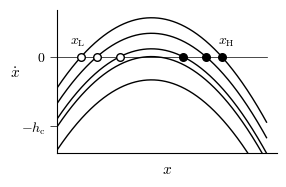

In [7]:
R=1
K=9

hc = R**0.5 * K**0.5 - 0.5
b = R*K/4

y=np.zeros((5,1000))
x=np.linspace(0,10,1000)

def f(x, i):
    return R*x*(1-x/K)-1-i/2

fig, ax = plt.subplots(figsize=(3,2))

for i in [0,1,2,4]:
    ax.plot(x,f(x,i),'k', linewidth=1, zorder=1)
    
ax.plot(x, f(x,hc), 'k', linewidth=1)

ax.set_xlim([0,10.5])
ax.set_xlabel(r'$x$',fontsize=11)
ax.set_xticks([])
ax.tick_params(axis='y', which='both', length=0)

ax.set_ylim(((-3.1, 1.5)))
ax.set_yticks([-b, 0])
ax.set_yticklabels([r'$-h_\mathrm{c}$', r'$0$'],fontsize=10)
ax.tick_params(axis='y', which='both', length=5, width=0.5, color='black', direction='out')

# yticklabels = ax.get_yticklabels()
# yticklabels[0].set_color('red')

ax.set_ylabel(r'$\dot{x}$',fontsize=11, rotation=0)

ax.plot([0,10],[0,0],color='k',linewidth=0.5, zorder=1)

for i in range(5):
    xH=(R+np.sqrt(R**2-4*R*(1+i/2)/K))/(2*R/K)
    ax.scatter(xH,0,30,'k', zorder=2)
    xL=(R-np.sqrt(R**2-4*R*(1+i/2)/K))/(2*R/K)
    ax.scatter(xL,0,30,edgecolors='k',facecolors='white',zorder=2)
    
# for i in range(3):
#     ax.arrow(2.8+0.95*i,0,1,0,width=0.001,length_includes_head=True,head_width=0.3,
#                 overhang=0.5,color='green',zorder=2)
# for i in range(1):
#     ax.arrow(7.3,0,-1,0,width=0.001,length_includes_head=True,head_width=0.3,
#                 overhang=0.5,color='green',zorder=2)
    
ax.text(7.7,0.4,r'$x_\mathrm{H}$',fontsize=10,color='k')
ax.text(0.6,0.4,r'$x_\mathrm{L}$',fontsize=10,color='k')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.tight_layout()

if Save:
    fig.savefig(str(savedir / 'ch10_DynEqnFishing.pdf'),  bbox_inches='tight')
    fig.savefig(str(savedir / 'ch10_DynEqnFishing.svg'), bbox_inches='tight')

/var/folders/yl/5q9cknc90hb_gxt6fwzjrl500000gn/T/ipykernel_20262/562109863.py:8: RuntimeWarning: invalid value encountered in sqrt
  ax.plot(t, (R-np.sqrt(R*R-4*R*t/K))/(2*R/K), 'k', zorder=1)
/var/folders/yl/5q9cknc90hb_gxt6fwzjrl500000gn/T/ipykernel_20262/562109863.py:9: RuntimeWarning: invalid value encountered in sqrt
  ax.plot(t, (R+np.sqrt(R*R-4*R*t/K))/(2*R/K), 'k', zorder=1)


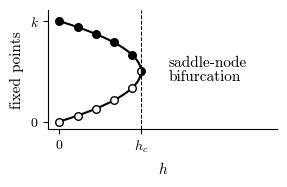

In [8]:
R=1
K=9

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3,2))

ax.axvline(2.25, linestyle='--', color='k', linewidth=0.75, zorder=1)
t = np.linspace(0,4,1000)
ax.plot(t, (R-np.sqrt(R*R-4*R*t/K))/(2*R/K), 'k', zorder=1)
ax.plot(t, (R+np.sqrt(R*R-4*R*t/K))/(2*R/K), 'k', zorder=1)


for i in range(5):
    h=i*0.5
    hl=(R-np.sqrt(R*R-4*R*h/K))/(2*R/K)
    hu=(R+np.sqrt(R*R-4*R*h/K))/(2*R/K)
    ax.scatter(h,hl,30,edgecolors='k',facecolors='white', zorder=2)
    ax.scatter(h,hu,30,'k', zorder=2)

ax.scatter(2.25,4.5,30, 'k', edgecolor="k", marker=MarkerStyle("o", fillstyle="right"))
ax.scatter(2.25,4.5,30, 'w', edgecolor="k", marker=MarkerStyle("o", fillstyle="left"))
    
ax.set_xlim([-0.3, 6])
ax.set_ylim([-0.7, 10])

ax.set_xticks([0,2.25])
ax.set_xticklabels([r'$0$',r'$h_c$'],fontsize=10)
ax.set_yticks([0,K])
ax.set_yticklabels([r'$0$',r'$k$'],fontsize=10)
ax.set_xlabel(r'$h$',fontsize=11)
ax.set_ylabel('fixed points',fontsize=11)

ax.text(3,4.9,r'saddle-node',fontsize=11,color='k')
ax.text(3,3.6,r'bifurcation',fontsize=11,color='k')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.tight_layout()

if Save:
    fig.savefig(str(savedir / 'ch10_FishBifurcation.pdf'), dpi=600, format='pdf', bbox_inches='tight')
    fig.savefig(str(savedir / 'ch10_FishBifurcation.svg'), dpi=600, format='svg', bbox_inches='tight')

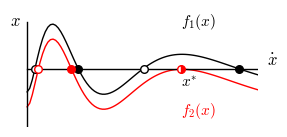

In [9]:
from matplotlib.markers import MarkerStyle
x=np.linspace(0,30,100)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3,1.5))
ax.plot(x, -1+(2*x**2-0.45*x**3+0.025*x**4)*np.exp(-x/3), 'k-', linewidth=1, zorder=1)
ax.plot(x, -1.64+(2*x**2-0.45*x**3+0.025*x**4)*np.exp(-x/3), 'r-', linewidth=1, zorder=1)

ax.set_yticks([])
ax.set_xticks([])

ax.set_xlim((-1,27))
ax.set_ylim((-2.5,2.5))

ax.axis('off')
ax.plot([0,0],[-3,2],'k', linewidth=1.0, zorder=1)
ax.plot([0,30],[0,0],'k', linewidth=1.0, zorder=1)
ax.text(-2,1.8,r'$x$',fontsize=12,color='k')
ax.text(28,0.1,r'$\dot x$',fontsize=12,color='k')

scatter_size = 30

ax.scatter(0.9,0,scatter_size, edgecolor="black",facecolors='white', zorder=2)
ax.scatter(6,0,scatter_size, 'black', edgecolor="black")
ax.scatter(13.6,0,scatter_size, edgecolor="black",facecolors='white', zorder=2)
ax.scatter(24.7,0,scatter_size, 'black')

ax.scatter(1.3,0,scatter_size, edgecolor="r",facecolors='white', zorder=2)
ax.scatter(5.1,0,scatter_size, 'r', edgecolor="r")

ax.scatter(18,0,scatter_size, 'r', marker=MarkerStyle("o", fillstyle="right"))
ax.scatter(18,0,scatter_size, 'w', edgecolor="r", marker=MarkerStyle("o", fillstyle="left"))

ax.text(18,1.8,r'$f_1(x)$',fontsize=11,color='k')
ax.text(18,-2,r'$f_2(x)$',fontsize=11,color='r')
ax.text(18,-0.8,r'$x^{*}$',fontsize=11,color='k')


fig.tight_layout()

if Save:
    fig.savefig(str(savedir / 'ch10_genericBif.pdf'), dpi=600, format='pdf', bbox_inches='tight')
    fig.savefig(str(savedir / 'ch10_genericBif.svg'), dpi=600, format='svg', bbox_inches='tight')

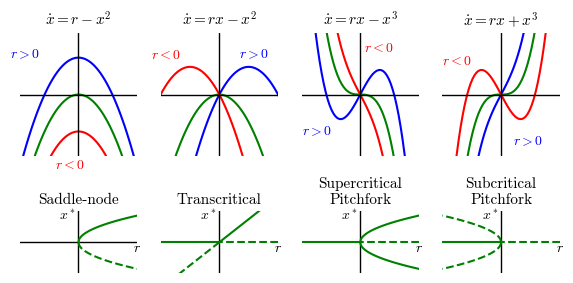

In [10]:

R=1
K=9
x=np.linspace(-5,5,100)

fig = plt.figure(figsize=(6,3))
gs = gridspec.GridSpec(nrows=2, ncols=4, width_ratios=[1,1,1,1], height_ratios=[2, 1])
gs.update(wspace=0.2, hspace=0.6)

axes=np.empty((2,4),dtype=object)

axes[0,0] = fig.add_subplot(gs[0, 0])
R=3
axes[0,0].plot(x, R-x**2, 'b-')
R=0
axes[0,0].plot(x, R-x**2, 'g-')
R=-3
axes[0,0].plot(x, R-x**2, 'r-')

axes[0,0].set_xlabel(r'$x$')
axes[0,0].set_ylabel(r'$\dot{x}$', rotation=0)

axes[0,0].set_xlim((-3,3))
axes[0,0].set_ylim((-5,5))
axes[0,0].set_yticks([])
axes[0,0].set_xticks([])

axes[0][0].plot([-3,3],[0,0],color='k', linewidth= 1.0)
axes[0][0].plot([0,0],[-5,5],color='k', linewidth=1.0)
# axes[0][0].text(-2.2,5.2,r'$\dot{x}=r-x^2$',fontsize=11,color='k')
axes[0][0].set_title(r'$\dot{x}=r-x^2$',fontsize=11,color='k')

axes[0][0].text(-3.5,3,r'$r>0$',fontsize=10,color='b')
axes[0][0].text(-1.2,-6,r'$r<0$',fontsize=10,color='r')
axes[0][0].axis('off')
# axes[0][0].set_aspect('equal')

axes[0,1] = fig.add_subplot(gs[0, 1])
R=3
axes[0][1].plot(x, R*x-x**2,'b-')
R=0
axes[0][1].plot(x, R*x-x**2,'g-')
R=-3
axes[0][1].plot(x, R*x-x**2,'r-')

axes[0,1].set_xlabel(r'$x$')
axes[0,1].set_ylabel(r'$\dot{x}$', rotation=0)

axes[0][1].plot([-3,3],[0,0],color='k', linewidth= 1.0)
axes[0][1].plot([0,0],[-5,5],color='k', linewidth= 1.0)
axes[0][1].axis('off')

axes[0,1].set_xlim((-3,3))
axes[0,1].set_ylim((-5,5))
axes[0,1].set_yticks([])
axes[0,1].set_xticks([])
# axes[0][1].text(-3,5.2,r'$\dot{x}=rx-x^2$',fontsize=11,color='k')
axes[0][1].set_title(r'$\dot{x}=rx-x^2$',fontsize=11,color='k')

axes[0][1].text(-3.5,3,r'$r<0$',fontsize=10,color='r')
axes[0][1].text(1,3,r'$r>0$',fontsize=10,color='b')
# axes[0][1].set_aspect('equal')

axes[0,2] = fig.add_subplot(gs[0, 2])
R=3
axes[0][2].plot(x, R*x-x**3,'b-')
R=0
axes[0][2].plot(x, R*x-x**3, 'g-')
R=-3
axes[0][2].plot(x, R*x-x**3, 'r-')

axes[0,2].set_xlabel(r'$x$')
axes[0,2].set_ylabel(r'$\dot{x}$', rotation=0)
axes[0,2].set_xlim((-3,3))
axes[0,2].set_ylim((-5,5))
axes[0,2].set_yticks([])
axes[0,2].set_xticks([])
axes[0][2].plot([-3,3],[0,0],color='k', linewidth=  1.0)
axes[0][2].plot([0,0],[-5,5],color='k', linewidth=  1.0)
axes[0][2].axis('off')
# axes[0][2].text(-3,5.2,r'$\dot{x}=rx-x^3$',fontsize=11,color='k')
axes[0][2].set_title(r'$\dot{x}=rx-x^3$',fontsize=11,color='k')
axes[0][2].text(-3.0,-3.2,r'$r>0$',fontsize=10,color='b')
axes[0][2].text(0.2,3.5,r'$r<0$',fontsize=10,color='r')
# axes[0][2].set_aspect('equal')

axes[0,3] = fig.add_subplot(gs[0, 3])
R=3
axes[0,3].plot(x, R*x+x**3, 'b-')
R=0
axes[0,3].plot(x, R*x+x**3,'g-')
R=-3
axes[0,3].plot(x, R*x+x**3,'r-')

axes[0,3].set_xlabel(r'$x$')
axes[0,3].set_ylabel(r'$\dot{x}$', rotation=0)

axes[0,3].set_xlim((-3,3))
axes[0,3].set_ylim((-5,5))
axes[0,3].set_yticks([])
axes[0,3].set_xticks([])

axes[0][3].plot([-3,3],[0,0],color='k', linewidth=  1.0)
axes[0][3].plot([0,0],[-5,5],color='k', linewidth=  1.0)
# axes[0][3].text(-3,5.2,r'$\dot{x}=rx+x^3$',fontsize=11,color='k')
axes[0][3].set_title(r'$\dot{x}=rx+x^3$',fontsize=11,color='k')
axes[0][3].text(0.6,-4,r'$r>0$',fontsize=10,color='b')
axes[0][3].text(-3,2.5,r'$r<0$',fontsize=10,color='r')
axes[0][3].axis('off')
# axes[0][3].set_aspect('equal')

axes[1,0] = fig.add_subplot(gs[1, 0])
x=np.linspace(0,3,100)
axes[1][0].plot([-3,3],[0,0],color='k', linewidth=1.0)
axes[1][0].plot([0,0],[-5,5],color='k', linewidth= 1.0)
axes[1,0].plot(x, np.sqrt(x), 'g-')
axes[1,0].plot(x, -np.sqrt(x),'g--')

axes[1,0].set_xlabel(r'$r$')
axes[1,0].set_ylabel(r'$x$', rotation=0)
axes[1,0].set_xlim((-3,3))
axes[1,0].set_ylim((-2,2))
axes[1,0].set_yticks([])
axes[1,0].set_xticks([])
axes[1][0].axis('off')
# axes[1][0].set_aspect('equal')
# axes[1][0].text(-1.6,-3,r'Saddle-node',fontsize=11,color='k')
axes[1][0].set_title(r'Saddle-node',fontsize=11,color='k')
axes[1][0].text(2.8,-0.6,r'$r$',fontsize=10,color='k')
axes[1][0].text(-1.0,1.5,r'$x^*$',fontsize=10,color='k')

axes[1,1] = fig.add_subplot(gs[1, 1])
x=np.linspace(0,3,100)
axes[1][1].plot([0,0],[-5,5],color='k', linewidth=1.0)
axes[1][1].plot([-3,0], [0,0], 'g-')
axes[1][1].plot([3,0], [0,0], 'g--')
axes[1][1].plot(x, x, 'g-')
axes[1][1].plot(-x, -x, 'g--')
axes[1,1].set_xlabel(r'$r$')
axes[1,1].set_ylabel(r'$x$', rotation=0)
axes[1,1].set_xlim((-3,3))
axes[1,1].set_ylim((-2,2))
axes[1,1].set_yticks([])
axes[1,1].set_xticks([])
axes[1][1].axis('off')
# axes[1][1].set_aspect('equal')
# axes[1][1].text(-1.6,-3,r'Transcritical',fontsize=11,color='k')
axes[1][1].set_title(r'Transcritical',fontsize=11,color='k')
axes[1][1].text(2.8,-0.6,r'$r$',fontsize=10,color='k')
axes[1][1].text(-1.0,1.5,r'$x^*$',fontsize=10,color='k')

axes[1,2] = fig.add_subplot(gs[1, 2])
x=np.linspace(0,3,100)
#axes[1][2].plot([-3,3],[0,0],color='k')
axes[1][2].plot([0,0],[-5,5],color='k', linewidth=1.0)
axes[1,2].plot([-3,0], [0,0], 'g-')
axes[1,2].plot([3,0], [0,0], 'g--')
axes[1,2].plot(x, np.sqrt(x), 'g-')
axes[1,2].plot(x, -np.sqrt(x), 'g-')
axes[1,2].set_xlabel(r'$r$')
axes[1,2].set_ylabel(r'$x$', rotation=0)
axes[1,2].set_xlim((-3,3))
axes[1,2].set_ylim((-2,2))
axes[1,2].set_yticks([])
axes[1,2].set_xticks([])
axes[1][2].axis('off')
# axes[1][2].set_aspect('equal')
# axes[1][2].text(-2.2,-3,r'Supercritical Pitchfork',fontsize=11,color='k')
axes[1][2].set_title(r'Supercritical'+'\n'+r'Pitchfork',fontsize=11,color='k')
axes[1][2].text(2.8,-0.6,r'$r$',fontsize=10,color='k')
axes[1][2].text(-1,1.5,r'$x^*$',fontsize=10,color='k')

axes[1,3] = fig.add_subplot(gs[1, 3])
x=np.linspace(0,3,100)
axes[1][3].plot([0,0],[-5,5],color='k', linewidth=1.0)
axes[1,3].plot([-3,0], [0,0], 'g-')
axes[1,3].plot([3,0], [0,0],'g--')
axes[1,3].plot(-x, -np.sqrt(x), 'g--')
axes[1,3].plot(-x, np.sqrt(x),'g--')
axes[1,3].set_xlabel(r'$r$')
axes[1,3].set_ylabel(r'$x$', rotation=0)
axes[1,3].set_xlim((-3,3))
axes[1,3].set_ylim((-2,2))
axes[1,3].set_yticks([])
axes[1,3].set_xticks([])
axes[1][3].axis('off')
# axes[1][3].set_aspect('equal')
# axes[1][3].text(-2,-3,r'Subcritical Pitchfork',fontsize=11,color='k')
axes[1][3].set_title(r'Subcritical'+'\n'+ r'Pitchfork',fontsize=11,color='k')
axes[1][3].text(2.8,-0.6,r'$r$',fontsize=10,color='k')
axes[1][3].text(-1,1.5,r'$x^*$',fontsize=10,color='k')


# fig.tight_layout()
fig.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.1)

if Save:
    fig.savefig(str(savedir / 'ch10_1Dbifurcations.pdf'), format='pdf')
    fig.savefig(str(savedir / 'ch10_1Dbifurcations.svg'), format='svg')

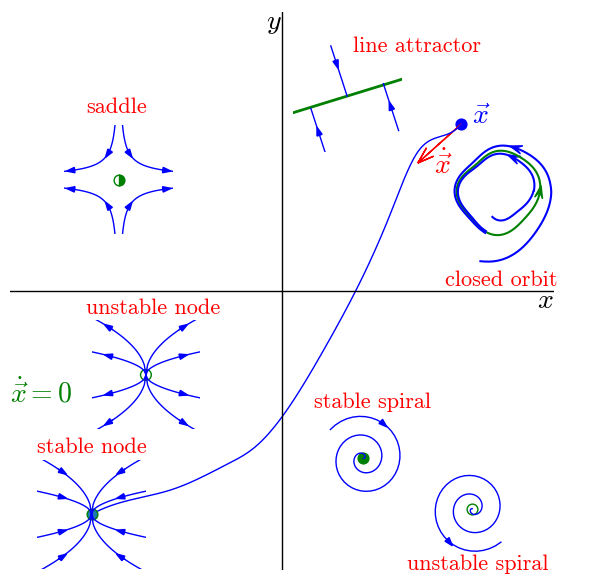

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))

# SADDLE
ax2 = ax.inset_axes([-4, 1, 2, 2], transform = ax.transData)

R=[1,-1]
K=9
x=np.linspace(-3,3,150)
x1=np.linspace(0,3,75)
x2=np.linspace(-3,0,75)


for i in range(2):
    Xs=R[i]*x1[1:]
    Ys=1/(x1[1:]**0.7)
    ax2.plot(R[i]*x1[1:], 1/(x1[1:]**0.7), 'b-', linewidth=1);
    ax2.arrow(Xs[65],Ys[65],Xs[70]-Xs[65],Ys[70]-Ys[65],width=0.001,length_includes_head=True,head_width=0.3,
                overhang=0,color='blue')
    ax2.arrow(Xs[15],Ys[15],Xs[16]-Xs[14],Ys[16]-Ys[14],width=0.001,length_includes_head=True,head_width=0.3,
                overhang=0,color='blue')
    Xs=R[i]*x1[1:]
    Ys=-1/(x1[1:]**0.7)
    ax2.plot(R[i]*x1[1:], -1/x1[1:]**0.7, 'b-', linewidth=1);
    ax2.arrow(Xs[65],Ys[65],Xs[70]-Xs[65],Ys[70]-Ys[65],width=0.001,length_includes_head=True,head_width=0.3,
                overhang=0,color='blue')
    ax2.arrow(Xs[15],Ys[15],Xs[16]-Xs[14],Ys[16]-Ys[14],width=0.001,length_includes_head=True,head_width=0.3,
                overhang=0,color='blue')
ax2.scatter(0,0,60, 'g', marker=MarkerStyle("o", fillstyle="right"))
ax2.scatter(0,0,60, 'w', edgecolor="g", marker=MarkerStyle("o", fillstyle="left"))
ax2.set_aspect('equal')

ax2.set_xlim([-3,3])
ax2.set_ylim([-3,3])
ax2.axis("off")
ax2.set_aspect('equal')

# ORBIT

ax3 = ax.inset_axes([2.5, 0.3, 3, 3], transform = ax.transData)

import random

def RPsmooth(x):
    x2=np.zeros(x.shape[0]+2)
    y=np.zeros(x.shape)
    x2[1:-1]=x
    x2[0]=x[-1]
    x2[-1]=x[0]
    for i in range(len(x)):
        y[i]=np.sum(x2[(i):(i+3)])/3
    return y

def RPsmooth2(x):
    y1=np.copy(x)
    y2=np.copy(x)
    for i in range(len(x)-2):
        y1[i+1]=np.sum(x[i:(i+3)])/3
    for i in range(len(x)-2):
        y2[i+1]=np.sum(y1[i:(i+3)])/3
    return y2

random.seed(32)
theta=np.linspace(0,2*np.pi,100)
r=np.zeros(theta.shape)
for i in range(10):
    r=r+(random.random()-0.5)*np.sin((i+1)*theta/2)/10
r=RPsmooth(r+1)
x=r*np.cos(theta)
y=r*np.sin(theta)
ax3.plot(x,y,'g')
ax3.arrow(x[-1],y[-1],x[-1]-x[-3],y[-1]-y[-3],width=0.001,length_includes_head=True,head_width=0.2,
                overhang=0.5,color='g')

theta2=np.zeros(theta.shape)
theta2[:30]=theta[-30:]
theta2[30:]=theta[:70]
tr=np.zeros(theta.shape)
tr[:30]=r[-30:]
tr[30:]=r[:70]

r2=np.zeros(r.shape)
r2=np.sqrt(np.exp(-theta))
r2=r2/np.max(r2)
r3=tr-0.4*r2
x=r3*np.cos(theta2)
y=r3*np.sin(theta2)
ax3.plot(x,y,'b')
ax3.arrow(x[50],y[50],x[50]-x[49],y[50]-y[49],width=0.001,length_includes_head=True,head_width=0.2,
                overhang=0.5,color='b')

r4=tr+0.7*r2
x=r4*np.cos(theta2)
y=r4*np.sin(theta2)
ax3.plot(RPsmooth2(x),RPsmooth2(y),'b')
ax3.arrow(x[50],y[50],x[50]-x[49],y[50]-y[49],width=0.001,length_includes_head=True,head_width=0.2,
                overhang=0.5,color='b')

ax3.set_xlim([-2,2])
ax3.set_ylim([-2,2])
ax3.axis("off")

## NODE1
ax4 = ax.inset_axes([-4.5, -5, 2, 2], transform = ax.transData)

R=1
K=9
x=np.linspace(-3,3,100)
x1=np.linspace(0,3,50)
x2=np.linspace(-3,0,50)

R=[0.6,1.5,0.6,1.5,-0.6,-1.5,-0.6,-1.5]
S=[1,1,-1,-1,1,1,-1,-1]
for i in range(8):
    Xs=S[i]*x1
    Ys=R[i]*np.sqrt(x1)
    ax4.plot(S[i]*x1, R[i]*np.sqrt(x1), 'b-', linewidth=1);
    ax4.arrow(Xs[20],Ys[20],Xs[20]-Xs[25],Ys[20]-Ys[25],width=0.001,length_includes_head=True,head_width=0.2,
                overhang=0,color='blue')
ax4.axis('off')
ax4.scatter(0,0,60, edgecolor='g', marker=MarkerStyle("o"))
ax4.set_aspect('equal')

ax4.set_xlim([-2,2])
ax4.set_ylim([-2,2])
ax4.axis("off")

##
## NODE2
ax5 = ax.inset_axes([-3.5, -2.5, 2, 2], transform = ax.transData)

R=[0.6,1.5,0.6,1.5,-0.6,-1.5,-0.6,-1.5]
S=[1,1,-1,-1,1,1,-1,-1]
for i in range(8):
    Xs=S[i]*x1
    Ys=R[i]*np.sqrt(x1)
    ax5.plot(S[i]*x1, R[i]*np.sqrt(x1), 'b-', linewidth=1);
    ax5.arrow(Xs[20],Ys[20],Xs[25]-Xs[20],Ys[25]-Ys[20],width=0.001,length_includes_head=True,head_width=0.2,
                overhang=0,color='blue')

ax5.axis('off')

ax5.scatter(0,0,60,edgecolor='g',facecolor='none')
ax5.set_aspect('equal')


ax5.set_xlim([-2,2])
ax5.set_ylim([-2,2])
ax5.axis("off")

##

## SPIRAL 1

ax6 = ax.inset_axes([0.5, -4, 2, 2], transform = ax.transData)

x1=np.linspace(0,15,100)
x2=np.linspace(0,0.4,100)
x2=x2**1

Xs=2*x2*np.cos(x1)
Ys=2*x2*np.sin(x1)
ax6.plot(Xs,Ys, linewidth=1,color='blue')
ax6.arrow(Xs[90],Ys[90],(Xs[88]-Xs[90])/2,(Ys[88]-Ys[90])/2,width=0.001,length_includes_head=True,head_width=0.1,
                overhang=0,color='blue')
ax6.scatter(0,0,60, edgecolor='g', facecolor='g')

ax6.set_xlim([-1,1])
ax6.set_ylim([-1,1])
ax6.axis("off")

##

## SPIRAL 2

ax7 = ax.inset_axes([2.5, -4.9, 2, 2], transform = ax.transData)

x1=np.linspace(0,15,100)
x2=np.linspace(0,0.4,100)
x2=x2**1

Xs=2*x2*np.cos(x1+3)
Ys=2*x2*np.sin(x1+3)
ax7.plot(Xs,Ys, linewidth=1,color='blue')
ax7.arrow(Xs[90],Ys[90],(Xs[90]-Xs[88])/2,(Ys[90]-Ys[88])/2,width=0.001,length_includes_head=True,head_width=0.1,
                overhang=0,color='blue')
ax7.scatter(0,0,60, edgecolor='g', facecolor='w')

ax7.set_xlim([-1,1])
ax7.set_ylim([-1,1])
ax7.axis("off")

##

## LINE ATTRACTOR

ax8 = ax.inset_axes([0.2, 2.5, 2, 2], transform = ax.transData)

x1=np.linspace(-1,1,40)
Ys=0.3*x1
ax8.plot(x1,Ys, linewidth=2,color='g')

x1=np.linspace(-2/3,-2/3+0.5,50)
Xs=x1
Ys=-3*x1-20/9
ax8.plot(Xs,Ys, linewidth=1,color='b')
ax8.arrow(Xs[15],Ys[15],(Xs[30]-Xs[34]),(Ys[30]-Ys[34]),width=0.001,length_includes_head=True,head_width=0.1,
                overhang=0,color='blue')

x1=np.linspace(2/3,2/3+0.28,50)
Xs=x1
Ys=-3*x1+20/9
ax8.plot(Xs,Ys, linewidth=1,color='b')
ax8.arrow(Xs[23],Ys[23],(Xs[30]-Xs[34]),(Ys[30]-Ys[34]),width=0.001,length_includes_head=True,head_width=0.1,
                overhang=0,color='blue')

x1=np.linspace(-0.3,0,50)
Xs=x1
Ys=-3*x1
ax8.plot(Xs,Ys, linewidth=1,color='b')
ax8.arrow(Xs[20],Ys[20],(Xs[32]-Xs[30]),(Ys[32]-Ys[30]),width=0.001,length_includes_head=True,head_width=0.1,
                overhang=0,color='blue')



ax8.set_xlim([-1,1])
ax8.set_ylim([-1,1])
ax8.axis("off")

##

ax.text(-5,-2,r'$\dot{\vec{x}}=0$',fontsize=20,color='g')
ax.text(3,0.1,r'closed orbit',fontsize=16,color='r')
ax.text(-3.6,3.2,r'saddle',fontsize=16,color='r')
ax.text(-3.6,-0.4,r'unstable node',fontsize=16,color='r')
ax.text(-4.5,-2.9,r'stable node',fontsize=16,color='r')
ax.text(0.6,-2.1,r'stable spiral',fontsize=16,color='r')
ax.text(2.3,-5,r'unstable spiral',fontsize=16,color='r')
ax.text(1.3,4.3,r'line attractor',fontsize=16,color='r')
ax.text(-0.3,4.7,r'$y$',fontsize=20,color='k')
ax.text(4.7,-0.3,r'$x$',fontsize=20,color='k')

from scipy.interpolate import make_interp_spline

# Dataset
x = np.array([-3.5, -3, -2, -1, -0.5,  0.8, 2, 2.5, 3, 3.3])
y = np.array([-4, -3.8, -3.55, -3.1, -2.8,  -1, 1.4, 2.5, 2.8, 3])

X_Y_Spline = make_interp_spline(x, y,k=3)

# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)

# Plotting the Graph
ax.plot(X_, Y_,'b',linewidth=1)
#ax.plot(x,y)
ax.scatter(3.3,3,60,'b')
ax.text(3.5,3,r'$\vec{x}$',fontsize=20,color='b')
ax.arrow(3.3,3,-0.8,-0.7,width=0.001,length_includes_head=True,head_width=0.2,
                overhang=1,color='r')
ax.text(2.8,2.1,r'$\dot{\vec{x}}$',fontsize=20,color='r')


ax.plot([-5,5],[0,0],'k',linewidth=1)
ax.plot([0,0],[-5,5],'k',linewidth=1)
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])
ax.axis("off")
fig.tight_layout()
plt.show()

if Save:
    fig.savefig(str(savedir / '2Dfixed_point_zoo.pdf'), dpi=600, format='pdf', bbox_inches='tight')
    fig.savefig(str(savedir / '2Dfixed_point_zoo.svg'), dpi=600, format='svg', bbox_inches='tight')

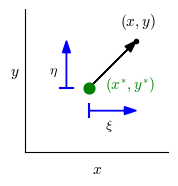

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(2,2))

ax.plot([1,1.3],[1,1.3],'k',linewidth=1.0,zorder=1)
ax.arrow(1, 1, 0.3, 0.3, width=0.001,length_includes_head=True,head_width=0.05,
    overhang=0,color='k')

ax.scatter([1],[1],60,'g',zorder=2)
# ax.scatter([1.3],[1.3],15,'k')
ax.plot(1.3,1.3,'k.')

ax.arrow(1, 0.86, 0.3, 0,width=0.001,length_includes_head=True,head_width=0.05,
    overhang=0,color='blue')
ax.arrow(0.86, 1, 0, 0.3,width=0.001,length_includes_head=True,head_width=0.05,
    overhang=0,color='blue')
ax.plot([1,1],[0.9,0.82],color='b')
ax.plot([0.82,0.9],[1,1],color='b')

ax.text(1.1,1.,r'$(x^{*},y^{*})$',fontsize=11,color='g')
ax.text(1.2,1.4,r'$(x,y)$',fontsize=11,color='k')
ax.text(0.75,1.1,r'$\eta$',fontsize=10,color='k')
ax.text(1.1,0.75,r'$\xi$',fontsize=10,color='k')
ax.set_aspect('equal')

ax.set_xlabel(r'$x$', fontsize=11)
ax.set_ylabel(r'$y$', rotation=0, fontsize=11)
ax.set_xlim((0.6,1.5))
ax.set_ylim((0.6,1.5))
ax.set_xticks([])
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


fig.tight_layout()

if Save:
    fig.savefig(str(savedir / 'ch10_2Dlinearization.pdf'), dpi=600, format='pdf', bbox_inches='tight')
    fig.savefig(str(savedir / 'ch10_2Dlinearization.svg'), dpi=600, format='svg', bbox_inches='tight')

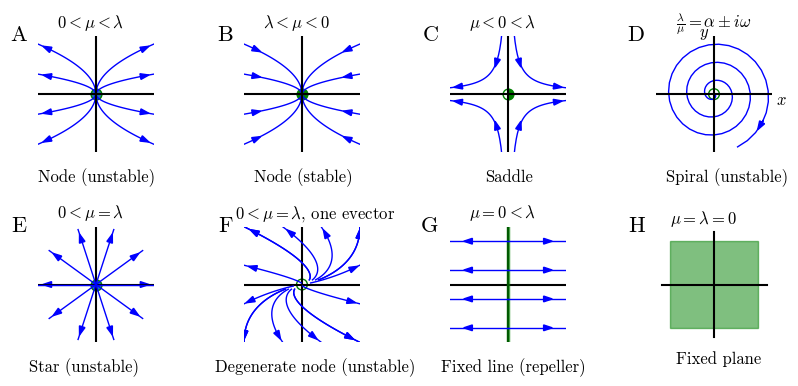

In [13]:
R=1
K=9
x=np.linspace(-3,3,100)
x1=np.linspace(0,3,50)
x2=np.linspace(-3,0,50)

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(8,4))
R=[0.6,1.5,0.6,1.5,-0.6,-1.5,-0.6,-1.5]
S=[1,1,-1,-1,1,1,-1,-1]
for i in range(8):
    Xs=S[i]*x1
    Ys=R[i]*np.sqrt(x1)
    plot(S[i]*x1, R[i]*np.sqrt(x1), xlabel=r'$x$', ylabel=r'$y$', 
              xlim=(-3,3), 
              ylim=(-3,3), yticks=[], xticks=[], 
              fmts=['b-'], 
              yrot=True,axes=axes[0][0], linewidth=1);
    axes[0][0].arrow(Xs[40],Ys[40],Xs[45]-Xs[40],Ys[45]-Ys[40],width=0.001,length_includes_head=True,head_width=0.3,
                overhang=0,color='blue')
axes[0][0].axis('off')
axes[0][0].text(-2,3.5,r'$0<\mu<\lambda$',fontsize=12,color='k')
axes[0][0].text(-3,-4.5,r'Node (unstable)',fontsize=12,color='k')
axes[0][0].scatter(0,0,60, edgecolor='g', marker=MarkerStyle("o"))
axes[0][0].set_aspect('equal')
axes[0][0].plot([-3,3],[0,0],color='k')
axes[0][0].plot([0,0],[-3,3],color='k')


R=[0.6,1.5,0.6,1.5,-0.6,-1.5,-0.6,-1.5]
S=[1,1,-1,-1,1,1,-1,-1]
for i in range(8):
    Xs=S[i]*x1
    Ys=R[i]*np.sqrt(x1)
    plot(S[i]*x1, R[i]*np.sqrt(x1), xlabel=r'$x$', ylabel=r'$y$', 
              xlim=(-3,3), 
              ylim=(-3,3), yticks=[], xticks=[], 
              fmts=['b-'], 
              yrot=True,axes=axes[0][1], linewidth=1);
    axes[0][1].arrow(Xs[40],Ys[40],Xs[40]-Xs[45],Ys[40]-Ys[45],width=0.001,length_includes_head=True,head_width=0.3,
                overhang=0,color='blue')
axes[0][1].plot([-3,3],[0,0],color='k')
axes[0][1].plot([0,0],[-3,3],color='k')
axes[0][1].axis('off')
axes[0][1].text(-2,3.5,r'$\lambda<\mu<0$',fontsize=12,color='k')
axes[0][1].text(-2.5,-4.5,r'Node (stable)',fontsize=12,color='k')
axes[0][1].scatter(0,0,60,'g', marker=MarkerStyle("o"))
axes[0][1].set_aspect('equal')


R=[1,-1]
for i in range(2):
    Xs=R[i]*x1[1:]
    Ys=1/(x1[1:])
    plot(R[i]*x1[1:], 1/(x1[1:]), xlabel=r'$x$', ylabel=r'$y$', 
              xlim=(-3,3), 
              ylim=(-3,3), yticks=[], xticks=[], 
              fmts=['b-'], 
              yrot=True,axes=axes[0][2], linewidth=1);
    axes[0][2].arrow(Xs[40],Ys[40],Xs[45]-Xs[40],Ys[45]-Ys[40],width=0.001,length_includes_head=True,head_width=0.3,
                overhang=0,color='blue')
    axes[0][2].arrow(Xs[8],Ys[8],Xs[9]-Xs[7],Ys[9]-Ys[7],width=0.001,length_includes_head=True,head_width=0.3,
                overhang=0,color='blue')
    Xs=R[i]*x1[1:]
    Ys=-1/(x1[1:])
    plot(R[i]*x1[1:], -1/x1[1:], xlabel=r'$x$', ylabel=r'$\dot{x}$', 
              xlim=(-3,3), 
              ylim=(-3,3), yticks=[], xticks=[], 
              fmts=['b-'], 
              yrot=True,axes=axes[0][2], linewidth=1);
    axes[0][2].arrow(Xs[40],Ys[40],Xs[45]-Xs[40],Ys[45]-Ys[40],width=0.001,length_includes_head=True,head_width=0.3,
                overhang=0,color='blue')
    axes[0][2].arrow(Xs[8],Ys[8],Xs[9]-Xs[7],Ys[9]-Ys[7],width=0.001,length_includes_head=True,head_width=0.3,
                overhang=0,color='blue')
axes[0][2].axis('off')
axes[0][2].plot([-3,3],[0,0],color='k')
axes[0][2].plot([0,0],[-3,3],color='k')
axes[0][2].text(-2,3.5,r'$\mu<0<\lambda$',fontsize=12,color='k')
axes[0][2].text(-1.2,-4.5,r'Saddle',fontsize=12,color='k')
axes[0][2].scatter(0,0,60, 'g', marker=MarkerStyle("o", fillstyle="right"))
axes[0][2].scatter(0,0,60, 'w', edgecolor="g", marker=MarkerStyle("o", fillstyle="left"))
axes[0][2].set_aspect('equal')

s=np.linspace(0,3,100)
theta=np.linspace(0,20,100)
plot(s*np.cos(theta), -s*np.sin(theta), xlabel=r'$x$', ylabel=r'$\dot{x}$', 
          xlim=(-3,3), 
          ylim=(-3,3), yticks=[], xticks=[], 
          fmts=['b-'], 
          yrot=True,axes=axes[0][3], linewidth=1);
axes[0][3].axis('off')
axes[0][3].plot([-3,3],[0,0],color='k')
axes[0][3].plot([0,0],[-3,3],color='k')
axes[0][3].text(-2,3.5,r'$\frac{\lambda}{\mu} = \alpha \pm i \omega$',fontsize=12,color='k')
axes[0][3].text(-2.5,-4.5,r'Spiral (unstable)',fontsize=12,color='k')
axes[0][3].scatter(0,0,60, edgecolor='g', facecolor='none')
axes[0][3].set_aspect('equal')
axes[0][3].text(3.2,-0.5,r'$x$',fontsize=12,color='k')
axes[0][3].text(-0.8,3,r'$y$',fontsize=12,color='k')
s=2.9;
theta=2.9*20/3
axes[0][3].arrow(s*np.cos(theta),-s*np.sin(theta),-0.3,-0.5,width=0.001,length_includes_head=True,head_width=0.3,
                overhang=0,color='blue')


axes[1][0].plot([-3,3],[0,0],color='k')
axes[1][0].plot([0,0],[-3,3],color='k')
axes[1][0].axis('off')
R=np.linspace(0,10,10)
for i in range(10):
    Xs=x1*np.cos(2*np.pi*(i+1)/10)
    Ys=x1*np.sin(2*np.pi*(i+1)/10)
    plot(x1*np.cos(2*np.pi*(i+1)/10), x1*np.sin(2*np.pi*(i+1)/10), xlabel=r'$r$', ylabel=r'$x$', 
              xlim=(-3,3), 
              ylim=(-3,3), yticks=[], xticks=[], 
              fmts=['b-'], 
              yrot=True,axes=axes[1][0], linewidth=1);
    axes[1][0].arrow(Xs[40],Ys[40],Xs[45]-Xs[40],Ys[45]-Ys[40],width=0.001,length_includes_head=True,head_width=0.3,
                overhang=0,color='blue')
axes[1][0].set_aspect('equal')
axes[1][0].text(-2,3.5,r'$0<\mu=\lambda$',fontsize=12,color='k')
axes[1][0].text(-3.5,-4.5,r'Star (unstable)',fontsize=12,color='k')
axes[1][0].scatter(0,0,60, edgecolor='g', marker=MarkerStyle("o"))



axes[1][1].plot([-3,3],[0,0],color='k')
axes[1][1].plot([0,0],[-3,3],color='k')
axes[1][1].axis('off')

L=-1
s=np.linspace(0,10,100)
K=[3,-3]
for i in range(4):
    for j in range(2):
        Xs=np.zeros(50)
        Ys=np.zeros(50)
        Xs[0]=K[j]
        Ys[0]=3-2*i
        for k in range(49):
            Xs[k+1]=Xs[k]+0.05*(L*Xs[k]+Ys[k])
            Ys[k+1]=Ys[k]+0.05*(L*Ys[k])
        plot(Xs, Ys,  xlabel=r'$r$', ylabel=r'$x$', 
                  xlim=(-3,3), 
                  ylim=(-3,3), yticks=[], xticks=[], 
                  fmts=['b-'], 
                  yrot=True,axes=axes[1][1], linewidth=1);
        axes[1][1].arrow(Xs[2],Ys[2],Xs[2]-Xs[3],Ys[2]-Ys[3],width=0.001,length_includes_head=True,head_width=0.3,
                overhang=0,color='blue')
for i in range(4):
    for j in range(2):
        Xs=np.zeros(50)
        Ys=np.zeros(50)
        Xs[0]=3-2*i
        Ys[0]=K[j]
        for k in range(49):
            Xs[k+1]=Xs[k]+0.05*(L*Xs[k]+Ys[k])
            Ys[k+1]=Ys[k]+0.05*(L*Ys[k])
        plot(Xs, Ys,  xlabel=r'$r$', ylabel=r'$x$', 
                  xlim=(-3,3), 
                  ylim=(-3,3), yticks=[], xticks=[], 
                  fmts=['b-'], 
                  yrot=True,axes=axes[1][1], linewidth=1);
        axes[1][1].arrow(Xs[2],Ys[2],Xs[2]-Xs[3],Ys[2]-Ys[3],width=0.001,length_includes_head=True,head_width=0.3,
                overhang=0,color='blue')
axes[1][1].set_aspect('equal')
axes[1][1].text(-3.5,3.5,r'$0<\mu=\lambda$, one evector',fontsize=12,color='k')
axes[1][1].text(-4.5,-4.5,r'Degenerate node (unstable)',fontsize=12,color='k')
axes[1][1].scatter(0,0,60, edgecolor='g', facecolor='none')


axes[1][2].plot([-3,3],[0,0],color='k')
axes[1][2].plot([0,0],[-3,3],color='k')
axes[1][2].plot([0,0],[-3,3],color='g', linewidth=2.5, alpha=0.7)
axes[1][2].axis('off')
R=[0.75,2.25]
for i in range(2):
    plot([0,3], [R[i],R[i]], xlabel=r'$r$', ylabel=r'$x$', 
              xlim=(-3,3), 
              ylim=(-3,3), yticks=[], xticks=[], 
              fmts=['b-'], 
              yrot=True,axes=axes[1][2], linewidth=1);
    plot([0,-3], [R[i],R[i]], xlabel=r'$r$', ylabel=r'$x$', 
              xlim=(-3,3), 
              ylim=(-3,3), yticks=[], xticks=[], 
              fmts=['b-'], 
              yrot=True,axes=axes[1][2], linewidth=1);
    plot([0,3], [-R[i],-R[i]], xlabel=r'$r$', ylabel=r'$x$', 
              xlim=(-3,3), 
              ylim=(-3,3), yticks=[], xticks=[], 
              fmts=['b-'], 
              yrot=True,axes=axes[1][2], linewidth=1);
    plot([0,-3], [-R[i],-R[i]], xlabel=r'$r$', ylabel=r'$x$', 
              xlim=(-3,3), 
              ylim=(-3,3), yticks=[], xticks=[], 
              fmts=['b-'], 
              yrot=True,axes=axes[1][2], linewidth=1);
    axes[1][2].arrow(2,R[i],0.3,0,width=0.001,length_includes_head=True,head_width=0.3,
                overhang=0,color='blue')
    axes[1][2].arrow(2,-R[i],0.3,0,width=0.001,length_includes_head=True,head_width=0.3,
                overhang=0,color='blue')
    axes[1][2].arrow(-2,R[i],-0.3,0,width=0.001,length_includes_head=True,head_width=0.3,
                overhang=0,color='blue')
    axes[1][2].arrow(-2,-R[i],-0.3,0,width=0.001,length_includes_head=True,head_width=0.3,
                overhang=0,color='blue')
axes[1][2].set_aspect('equal')
axes[1][2].text(-2,3.5,r'$\mu=0<\lambda$',fontsize=12,color='k')
axes[1][2].text(-3.5,-4.5,r'Fixed line (repeller)',fontsize=12,color='k')

x=np.linspace(0,3,100)
axes[1][3].plot([-3,3],[0,0],color='k')
axes[1][3].plot([0,0],[-3,3],color='k')
axes[1][3].axis('off')
axes[1][3].set_aspect('equal')
axes[1][3].text(-2.5,3.5,r'$\mu=\lambda=0$',fontsize=12,color='k')
axes[1][3].text(-2.2,-4.5,r'Fixed plane',fontsize=12,color='k')
from matplotlib.patches import Rectangle
axes[1][3].add_patch(Rectangle((-2.5, -2.5), 5, 5,color="g",alpha=0.5))

# Panel labels
labels = [['A', 'B', 'C', 'D'], ['E', 'F', 'G', 'H']]

# Add labels to each subplot
for i, ax_row in enumerate(axes):
    for j, ax in enumerate(ax_row):
        ax.text(-0.1, 1.1, labels[i][j], transform=ax.transAxes,
                fontsize=16, fontweight='bold', va='top', ha='right')


fig.tight_layout()

if Save:
    fig.savefig(str(savedir / 'ch10_2DFixedPoints.pdf'), dpi=600, format='pdf', bbox_inches='tight')
    fig.savefig(str(savedir / 'ch10_2DFixedPoints.svg'), dpi=600, format='svg', bbox_inches='tight')

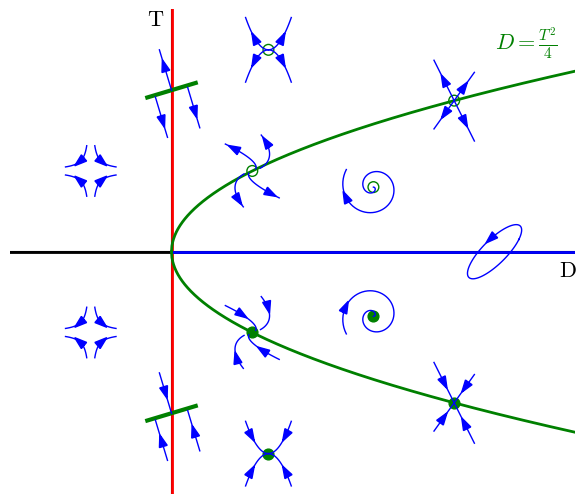

In [14]:
x=np.linspace(0,5,1000)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,6))

plot([-2,5], [0,0], xlabel=r'$x$', ylabel=r'$y$', 
        xlim=(-2,5), 
        ylim=(-3,3), yticks=[], xticks=[], 
        fmts=['k-'], 
        yrot=True, axes=axes);
axes.plot([-2,5],[0,0],'k-')
axes.plot([0,0],[-3,3],'k-')
axes.plot([0,0],[-3,3],'r-',linewidth=2)
axes.plot([0,5],[0,0],'b-',linewidth=2)
axes.plot(x,np.sqrt(x),'g-',linewidth=2)
axes.plot(x,-np.sqrt(x),'g-',linewidth=2)
axes.text(-0.3,2.8,r'T',fontsize=16,color='k')
axes.text(4.8,-0.3,r'D',fontsize=16,color='k')
axes.axis('off')
axes.set_aspect('equal')

position=[-1,1]
size=0.2

x1=np.linspace(0,10,100)
x2=np.linspace(0,0.4,100)
R=[2.5,-0.8]
Xs=R[0]+x2*np.cos(x1)
Ys=R[1]+x2*np.sin(x1)
axes.plot(Xs,Ys, linewidth=1,color='blue')
axes.arrow(Xs[90],Ys[90],(Xs[89]-Xs[91]),(Ys[89]-Ys[91]),width=0.001,length_includes_head=True,head_width=0.1,
                overhang=0,color='blue')
axes.scatter(R[0],R[1],60, edgecolor='g', facecolor='g')

x1=np.linspace(0,10,100)
x2=np.linspace(0,0.4,100)
R=[2.5,0.8]
Xs=R[0]+x2*np.cos(x1)
Ys=R[1]-x2*np.sin(x1)
axes.plot(Xs,Ys, linewidth=1,color='blue')
axes.arrow(Xs[90],Ys[90],(Xs[91]-Xs[89]),(Ys[91]-Ys[89]),width=0.001,length_includes_head=True,head_width=0.1,
                overhang=0,color='blue')
axes.scatter(R[0],R[1],60, edgecolor='g', facecolor='none')

x1=np.linspace(0.4,2.5,100)
S=[[-1,1],[-1,-1]]
for i in range(2):
    R=S[i]
    Xs=R[0]+x1/8
    Ys=R[1]-1/(8*x1)
    axes.plot(Xs,Ys, linewidth=1,color='blue')
    axes.arrow(Xs[40],Ys[40],(Xs[41]-Xs[25]),(Ys[41]-Ys[25]),width=0.001,length_includes_head=True,head_width=0.1,
                    overhang=0,color='blue')
    Xs=R[0]+x1/8
    Ys=R[1]+1/(8*x1)
    axes.plot(Xs,Ys, linewidth=1,color='blue')
    axes.arrow(Xs[40],Ys[40],(Xs[41]-Xs[25]),(Ys[41]-Ys[25]),width=0.001,length_includes_head=True,head_width=0.1,
                    overhang=0,color='blue')
    Xs=R[0]-x1/8
    Ys=R[1]+1/(8*x1)
    axes.plot(+Xs,Ys, linewidth=1,color='blue')
    axes.arrow(Xs[40],Ys[40],(Xs[41]-Xs[25]),(Ys[41]-Ys[25]),width=0.001,length_includes_head=True,head_width=0.1,
                    overhang=0,color='blue')

    Xs=R[0]-x1/8
    Ys=R[1]-1/(8*x1)
    axes.plot(Xs,Ys, linewidth=1,color='blue')
    axes.arrow(Xs[40],Ys[40],(Xs[41]-Xs[25]),(Ys[41]-Ys[25]),width=0.001,length_includes_head=True,head_width=0.1,
                    overhang=0,color='blue')

x1=np.linspace(-0.5,0.5,100)
S=[[3.5,np.sqrt(3.5)],[3.5,-np.sqrt(3.5)]]
for i in range(2):
    R=S[i]
    Xs=R[0]+x1/2
    Ys=R[1]-2*x1/2
    axes.plot(Xs,Ys, linewidth=1,color='blue')
    if i==0:
        axes.arrow(Xs[80],Ys[80],(Xs[81]-Xs[79]),(Ys[81]-Ys[79]),width=0.001,length_includes_head=True,head_width=0.1,
                    overhang=0,color='blue')
        axes.arrow(Xs[20],Ys[20],(Xs[19]-Xs[21]),(Ys[19]-Ys[21]),width=0.001,length_includes_head=True,head_width=0.1,
                    overhang=0,color='blue')
        axes.scatter(R[0],R[1],60, edgecolor='g', facecolor='none')
    if i==1:
        axes.arrow(Xs[70],Ys[70],(Xs[69]-Xs[71]),(Ys[69]-Ys[71]),width=0.001,length_includes_head=True,head_width=0.1,
                    overhang=0,color='blue')
        axes.arrow(Xs[30],Ys[30],(Xs[31]-Xs[29]),(Ys[31]-Ys[29]),width=0.001,length_includes_head=True,head_width=0.1,
                    overhang=0,color='blue')
        axes.scatter(R[0],R[1],60, edgecolor='g', facecolor='g')
    Xs=R[0]+x1/2
    Ys=R[1]+1.4*x1/2
    axes.plot(Xs,Ys, linewidth=1,color='blue')
    if i==0:
        axes.arrow(Xs[80],Ys[80],(Xs[81]-Xs[79]),(Ys[81]-Ys[79]),width=0.001,length_includes_head=True,head_width=0.1,
                    overhang=0,color='blue')
        axes.arrow(Xs[20],Ys[20],(Xs[19]-Xs[21]),(Ys[19]-Ys[21]),width=0.001,length_includes_head=True,head_width=0.1,
                    overhang=0,color='blue')
    if i==1:
        axes.arrow(Xs[70],Ys[70],(Xs[69]-Xs[71]),(Ys[69]-Ys[71]),width=0.001,length_includes_head=True,head_width=0.1,
                    overhang=0,color='blue')
        axes.arrow(Xs[30],Ys[30],(Xs[31]-Xs[29]),(Ys[31]-Ys[29]),width=0.001,length_includes_head=True,head_width=0.1,
                    overhang=0,color='blue')

x1=np.linspace(0,2*3.15,100)
Xs=0.3*np.cos(x1)+0.15*np.sin(x1)+4
Ys=0.3*np.sin(x1)+0.15*np.cos(x1)
axes.plot(Xs,Ys, linewidth=1,color='blue')
axes.arrow(Xs[35],Ys[35],(Xs[36]-Xs[34]),(Ys[36]-Ys[34]),width=0.001,length_includes_head=True,head_width=0.1,
                overhang=0,color='blue')

x1=np.linspace(-0.3,0.3,40)
Xs=x1
Ys=0.3*x1+2
axes.plot(Xs,Ys, linewidth=3,color='g')
x1=np.linspace(0,-0.15,50)
Xs=x1
Ys=-3.33*x1+2
axes.plot(Xs,Ys, linewidth=1,color='b')
axes.arrow(Xs[35],Ys[35],(Xs[36]-Xs[34]),(Ys[36]-Ys[34]),width=0.001,length_includes_head=True,head_width=0.1,
                overhang=0,color='blue')
x1=np.linspace(0.2,0.35,50)
Xs=x1
Ys=-3.33*x1+2.7
axes.plot(Xs,Ys, linewidth=1,color='b')
axes.arrow(Xs[35],Ys[35],(Xs[36]-Xs[34]),(Ys[36]-Ys[34]),width=0.001,length_includes_head=True,head_width=0.1,
                overhang=0,color='blue')
x1=np.linspace(-0.2,-0.05,50)
Xs=x1
Ys=-3.33*x1+1.25
axes.plot(Xs,Ys, linewidth=1,color='b')
axes.arrow(Xs[35],Ys[35],(Xs[36]-Xs[34]),(Ys[36]-Ys[34]),width=0.001,length_includes_head=True,head_width=0.1,
                overhang=0,color='blue')
        
x1=np.linspace(-0.3,0.3,40)
Xs=x1
Ys=0.3*x1-2
axes.plot(Xs,Ys, linewidth=3,color='g')
x1=np.linspace(0,-0.15,50)
Xs=x1
Ys=-3.33*x1-2
axes.plot(Xs,Ys, linewidth=1,color='b')
axes.arrow(Xs[20],Ys[20],(Xs[19]-Xs[21]),(Ys[19]-Ys[21]),width=0.001,length_includes_head=True,head_width=0.1,
                overhang=0,color='blue')
x1=np.linspace(0.2,0.35,50)
Xs=x1
Ys=-3.33*x1-1.3
axes.plot(Xs,Ys, linewidth=1,color='b')
axes.arrow(Xs[20],Ys[20],(Xs[19]-Xs[21]),(Ys[19]-Ys[21]),width=0.001,length_includes_head=True,head_width=0.1,
                overhang=0,color='blue')
x1=np.linspace(-0.2,-0.05,50)
Xs=x1
Ys=-3.33*x1-2.75
axes.plot(Xs,Ys, linewidth=1,color='b')
axes.arrow(Xs[20],Ys[20],(Xs[19]-Xs[21]),(Ys[19]-Ys[21]),width=0.001,length_includes_head=True,head_width=0.1,
                overhang=0,color='blue')

x1=np.linspace(0,2,100)
Ys=x1/5+2.5
Xs=np.sqrt(x1)/5+1.2
axes.plot(Xs,Ys, linewidth=1,color='b')
axes.arrow(Xs[50],Ys[50],(Xs[51]-Xs[49]),(Ys[51]-Ys[49]),width=0.001,length_includes_head=True,head_width=0.1,
                overhang=0,color='blue')
Ys=x1/5+2.5
Xs=-np.sqrt(x1)/5+1.2
axes.plot(Xs,Ys, linewidth=1,color='b')
axes.arrow(Xs[50],Ys[50],(Xs[51]-Xs[49]),(Ys[51]-Ys[49]),width=0.001,length_includes_head=True,head_width=0.1,
                overhang=0,color='blue')
Ys=-x1/5+2.5
Xs=-np.sqrt(x1)/5+1.2
axes.plot(Xs,Ys, linewidth=1,color='b')
axes.arrow(Xs[50],Ys[50],(Xs[51]-Xs[49]),(Ys[51]-Ys[49]),width=0.001,length_includes_head=True,head_width=0.1,
                overhang=0,color='blue')
Ys=-x1/5+2.5
Xs=np.sqrt(x1)/5+1.2
axes.plot(Xs,Ys, linewidth=1,color='b')
axes.arrow(Xs[50],Ys[50],(Xs[51]-Xs[49]),(Ys[51]-Ys[49]),width=0.001,length_includes_head=True,head_width=0.1,
                overhang=0,color='blue')

x1=np.linspace(0,2,100)
Ys=x1/5-2.5
Xs=np.sqrt(x1)/5+1.2
axes.plot(Xs,Ys, linewidth=1,color='b')
axes.arrow(Xs[40],Ys[40],(Xs[39]-Xs[41]),(Ys[39]-Ys[41]),width=0.001,length_includes_head=True,head_width=0.1,
                overhang=0,color='blue')
Ys=x1/5-2.5
Xs=-np.sqrt(x1)/5+1.2
axes.plot(Xs,Ys, linewidth=1,color='b')
axes.arrow(Xs[40],Ys[40],(Xs[39]-Xs[41]),(Ys[39]-Ys[41]),width=0.001,length_includes_head=True,head_width=0.1,
                overhang=0,color='blue')
Ys=-x1/5-2.5
Xs=-np.sqrt(x1)/5+1.2
axes.plot(Xs,Ys, linewidth=1,color='b')
axes.arrow(Xs[40],Ys[40],(Xs[39]-Xs[41]),(Ys[39]-Ys[41]),width=0.001,length_includes_head=True,head_width=0.1,
                overhang=0,color='blue')
Ys=-x1/5-2.5
Xs=np.sqrt(x1)/5+1.2
axes.plot(Xs,Ys, linewidth=1,color='b')
axes.arrow(Xs[40],Ys[40],(Xs[39]-Xs[41]),(Ys[39]-Ys[41]),width=0.001,length_includes_head=True,head_width=0.1,
                overhang=0,color='blue')
axes.scatter(1.2,-2.5,60, edgecolor='g', facecolor='g')
axes.scatter(1.2,2.5,60, edgecolor='g', facecolor='none')


s=np.linspace(0,10,100)
K=[[1,4],[-3,3],[3,-3],[-1,-4]]
for j in range(4):
    Xs=np.zeros(50)
    Ys=np.zeros(50)
    Xs[0]=K[j][0]
    Ys[0]=K[j][1]
    for k in range(49):
        Xs[k+1]=Xs[k]+0.05*(L*Xs[k]+Ys[k])
        Ys[k+1]=Ys[k]+0.05*(L*Ys[k])
    Xs=Xs/9+1
    Ys=Ys/9+1
    axes.plot(Xs, Ys, linewidth=1,color='b');
    axes.arrow(Xs[2],Ys[2],Xs[2]-Xs[3],Ys[2]-Ys[3],width=0.001,length_includes_head=True,head_width=0.1,
            overhang=0,color='blue')
K=[[1,4],[-3,3],[3,-3],[-1,-4]]
for j in range(4):
    Xs=np.zeros(50)
    Ys=np.zeros(50)
    Xs[0]=K[j][0]
    Ys[0]=K[j][1]
    for k in range(49):
        Xs[k+1]=Xs[k]+0.05*(L*Xs[k]+Ys[k])
        Ys[k+1]=Ys[k]+0.05*(L*Ys[k])
    Xs=Xs/9+1
    Ys=Ys/9-1
    axes.plot(Xs, Ys, linewidth=1,color='b');
    axes.arrow(Xs[10],Ys[10],Xs[11]-Xs[9],Ys[11]-Ys[9],width=0.001,length_includes_head=True,head_width=0.1,
            overhang=0,color='blue')
axes.scatter(1,1,60, edgecolor='g', facecolor='none')
axes.scatter(1,-1,60, edgecolor='g', facecolor='g')

axes.text(4,2.5,r'$D=\frac{T^2}{4}$',fontsize=16,color='g')
axes.set_aspect('equal')

fig.tight_layout()

if Save:
    fig.savefig(str(savedir / 'ch10_2Dzoo.pdf'), bbox_inches='tight')
    fig.savefig(str(savedir / 'ch10_2Dzoo.svg'), bbox_inches='tight')

### Bifurcation analysis of 2D systems

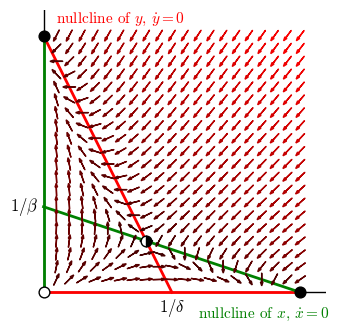

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4,4))
beta=3
delta=2
gamma=2


axes.plot([0,1.1],[0,0],color='k',linewidth=1,zorder=1)
axes.plot([0,0],[0,1.1],color='k',linewidth=1,zorder=1)
axes.plot([0,1/delta],[1,0],color='r',linewidth=2,zorder=1)
axes.plot([0,1],[0,0],color='r',linewidth=2,zorder=1)
axes.plot([0,1],[1/beta,0],color='g',linewidth=2,zorder=1)
axes.plot([0,0],[0,1],color='g',linewidth=2,zorder=1)


axes.axis('off')

axes.text(0.05,1.05,r'nullcline of $y$, $\dot y =0 $', fontsize=11, color='r')
axes.text(0.6,-0.1,r'nullcline of $x$, $\dot x =0 $', fontsize=11, color='g')
axes.set_aspect('equal')
axes.set_xlim([-0.1,1.1])
axes.set_ylim([-0.1,1.1])

axes.scatter(0,1,60, edgecolor='k', facecolor='k',zorder=2)
axes.scatter(1,0,60, edgecolor='k', facecolor='k',zorder=2)
axes.scatter(0,0,60, edgecolor='k', facecolor='white',zorder=2)

# make the saddle point marker from two half circles
x0=(beta-1)/(beta*delta-1)
y0=1-delta*x0
axes.scatter(x0, y0, 60, edgecolor='k', facecolor='k',zorder=2,  marker=MarkerStyle("o", fillstyle="right"))
axes.scatter(x0, y0, 60, facecolor='white', edgecolor='black',zorder=2, 
             marker=MarkerStyle("o",fillstyle="left"))


Rmax=0
for i in range(20):
    for j in range(20):
        x=(i+1)/20
        y=(j+1)/20
        xD=x*(1-x-beta*y)
        yD=gamma*y*(1-y-delta*x)
        R=np.sqrt(xD**2+yD**2)
        if R>Rmax:
            Rmax=R

for i in range(20):
    for j in range(20):
        x=(i+1)/20
        y=(j+1)/20
        xD=x*(1-x-beta*y)
        yD=gamma*y*(1-y-delta*x)
        R=np.sqrt(xD**2+yD**2)
        thisR=R
        R=R*80
        xD=xD/(R/2)
        yD=yD/(R/2)
        axes.arrow(x-xD,y-yD,2*xD,2*yD,width=0.0005,length_includes_head=True,head_width=0.01,
                overhang=0,color=[np.power(thisR/Rmax,0.3),0,0])

axes.text(1/delta,-0.02,r'$1/\delta$',fontsize=12,color='k',ha='center',va='top');
axes.text(-0.02,1/beta,r'$1/\beta$',fontsize=12,color='k',ha='right',va='center');

if Save:
    fig.savefig(str(savedir / 'ch10_LotkaVolterra.pdf'), format='pdf', bbox_inches='tight')

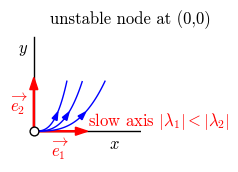

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(2.5,1.5))

# draw the axes explicitly
axes.axis('off')
axes.plot([0,0.4],[0,0],color='k',linewidth=1,zorder=1)
axes.plot([0,0],[0,0.35],color='k',linewidth=1,zorder=1)

# node
axes.scatter(0,0,40, edgecolor='k', facecolor='white',zorder=3)

# principal directions
axes.arrow(0,0,0.2,0,width=0.004,length_includes_head=True,head_width=0.03,
                overhang=0,color='r',zorder=2)
axes.arrow(0,0,0,0.2,width=0.004,length_includes_head=True,head_width=0.03,
                overhang=0,color='r',zorder=2)

# trajectories
a=[10,10**1.5,10**2]
b=[0.265,0.18,0.123]
for i in range(3):
    x=np.linspace(0,b[i],100)
    A=a[i]
    y=A*x**3
    axes.plot(x,y,color='b',linewidth=1)
    axes.arrow(x[70],y[70],x[71]-x[69],y[71]-y[69],width=0.001,length_includes_head=True,head_width=0.02,
                overhang=0,color='b')

# text labels
axes.text(0.1,-0.02,r'$\overrightarrow{e_1}$',fontsize=12,color='r', ha='center', va='top');
axes.text(-0.02,0.1,r'$\overrightarrow{e_2}$',fontsize=12,color='r', ha='right', va='center');
axes.text(-0.02,0.3,r'$y$',fontsize=12,color='k', ha='right', va='center');
axes.text(0.3,-0.02,r'$x$',fontsize=12,color='k', ha='center', va='top');
axes.text(0.06,0.4,r'unstable node at (0,0)',fontsize=12,color='k');
axes.text(0.2,0.02,r'slow axis $\vert \lambda_1 \vert < \vert \lambda_2 \vert $',fontsize=12,color='r');

# equal aspect ratio
axes.set_aspect('equal')
axes.set_xlim([-0.03,0.4]);
axes.set_ylim([-0.03,0.4]);

if Save:
    fig.savefig(str(savedir / 'ch10_LotkaVolterra_FP1.pdf'), format='pdf', bbox_inches='tight')

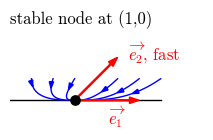

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(2.5,1.0))

# draw the axes explicitly
axes.axis('off')
axes.plot([0,1.4],[0,0],color='k',linewidth=1, zorder=1)
axes.plot([0,0],[0,0.3],color='k',linewidth=1, zorder=1)

gamma=3
beta=2
delta=2


# axes.scatter(1,0,60, edgecolor='k', facecolor='white')
axes.arrow(1, 0, 0.3, 0, width=0.005, length_includes_head=True,head_width=0.03,
           overhang=0,color='r',zorder=3)
axes.arrow(1, 0, 0.2, 0.2, width=0.005, length_includes_head=True,head_width=0.03,
           overhang=0,color='r',zorder=3)

t=[1,10**1.5,10**2]

t=np.linspace(0,5,50)

b=[0.8,0.9,1,1.2,1.3,1.4]
for i in range(6):
    x=np.zeros(200)
    y=np.zeros(200)
    x[0]=b[i]
    y[0]=0.1
    W=0.01
    for j in range(199):
        x[j+1]=x[j]+W*(x[j]*(1-x[j]-beta*y[j]))
        y[j+1]=y[j]+W*gamma*y[j]*(1-y[j]-delta*x[j])
    axes.plot(x,y,color='b',linewidth=1)
    axes.arrow(x[20],y[20],x[21]-x[19],y[21]-y[19],width=0.001,length_includes_head=True,head_width=0.02,
                overhang=0,color='b',zorder=2)
axes.scatter(1,0,45, edgecolor='k', facecolor='k', zorder=4)
# axes.text(-0.06,0.2,r'$y$',fontsize=11,color='k')
# axes.text(1.15,-0.09,r'$x$',fontsize=11,color='k')
axes.set_xlabel(r'$x$')
axes.set_ylabel(r'$y$', rotation=0)

axes.set_xticks([])
axes.set_yticks([])

axes.text(0.7,0.42,r'stable node at (1,0)',fontsize=12,color='k', ha='left', va='top')
axes.text(1.2,-0.02,r'$\overrightarrow{e_1}$',fontsize=12,color='r', ha='center', va='top')
axes.text(1.25,0.28,r'$\overrightarrow{e_2}$, fast',fontsize=12,color='r', ha='left', va='top')        
# axes.text(1.25,0.28,r'fast',fontsize=12,color='r', ha='left', va='top')

axes.set_aspect('equal')
axes.set_xlim([0.7,1.6])
axes.set_ylim([-0.02,0.2]);

if Save:
    fig.savefig(str(savedir / 'ch10_LotkaVolterra_FP2.pdf'), format='pdf', bbox_inches='tight')

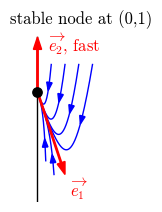

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(1,2.5))

axes.axis('off')
axes.plot([0,0.4],[0,0],color='k',linewidth=1,zorder=1)
axes.plot([0,0],[0,1.2],color='k',linewidth=1, zorder=1)

gamma=3
beta=2
delta=2

axes.scatter(0,1,45, edgecolor='k', facecolor='k', zorder=4)
axes.arrow(0,1,0,0.2,width=0.005,length_includes_head=True,head_width=0.03,
                overhang=0,color='r', zorder=3)
axes.arrow(0,1,0.1,-0.3,width=0.005,length_includes_head=True,head_width=0.03,
                overhang=0,color='r', zorder=3)

t=np.linspace(0,5,50)

bx=[0.05,0.1,0.15,0.2,0.03,0.06]
by=[1.1,1.1,1.1,1.1,0.75,0.7]

for i in range(6):
    x=np.zeros(200)
    y=np.zeros(200)
    x[0]=bx[i]
    y[0]=by[i]
    W=0.01
    for j in range(199):
        x[j+1]=x[j]+W*(x[j]*(1-x[j]-beta*y[j]))
        y[j+1]=y[j]+W*gamma*y[j]*(1-y[j]-delta*x[j])
    axes.plot(x,y,color='b',linewidth=1)
    axes.arrow(x[20],y[20],x[21]-x[19],y[21]-y[19],width=0.001,length_includes_head=True,head_width=0.02,
                overhang=0,color='b', zorder=2)
axes.scatter(1,0,60, edgecolor='k', facecolor='k')
axes.text(0.12,0.62,r'$\overrightarrow{e_1}$',fontsize=12,color='r')
axes.text(0.04,1.15,r'$\overrightarrow{e_2}$, fast',fontsize=12,color='r')        
# axes.text(-0.09,0.9,r'$y$',fontsize=12,color='k')
# axes.text(0.4,-0.09,r'$x$',fontsize=12,color='k')
axes.text(-0.1,1.25,'stable node at (0,1)',fontsize=12,color='k')
# axes.text(0.04,1.18,'fast',fontsize=12,color='r')

axes.set_aspect('equal')
axes.set_xlim([-0.02,0.25])
axes.set_ylim([0.6,1.3]);

if Save:
    fig.savefig(str(savedir / 'ch10_LotkaVolterra_FP3.pdf'), format='pdf', bbox_inches='tight')

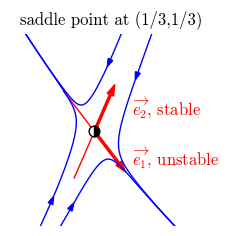

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(2.5,2.5))

axes.axis('off')
# axes.plot([0,0.5],[0,0],color='k',linewidth=1)
# axes.plot([0,0],[0,0.5],color='k',linewidth=1)

le = 0.05 # length of the eigenvectors
e1 = np.array([1,(1-np.sqrt(13))/2]); e1*=le/np.linalg.norm(e1)
e2= np.array([1,(1+np.sqrt(13))/2]); e2*=le/np.linalg.norm(e2)

gamma=3
beta=2
delta=2

axes.arrow(1/3,1/3,e1[0],e1[1],width=0.002,length_includes_head=True,head_width=0.007,
                overhang=0,color='r')
axes.arrow(1/3,1/3,e2[0],e2[1],width=0.002,length_includes_head=True,head_width=0.007,
                overhang=0,color='r')

axes.plot([1/3-e1[0],1/3+e1[0]],[1/3-e1[1],1/3+e1[1]],color='r',linewidth=1)
axes.plot([1/3-e2[0],1/3+e2[0]],[1/3-e2[1],1/3+e2[1]],color='r',linewidth=1)
axes.scatter(1/3, 1/3, 60, edgecolor='k', facecolor='k',zorder=2,  marker=MarkerStyle("o", fillstyle="right"))
axes.scatter(1/3, 1/3, 60, facecolor='white', edgecolor='black',zorder=2, 
             marker=MarkerStyle("o",fillstyle="left"))

XY0=[[0.28,0.24],[0.30,0.24],[0.39,0.43],[0.36,0.43]]

for i in range(4):
    x=np.zeros(1000)
    y=np.zeros(1000)
    x[0]=XY0[i][0]
    y[0]=XY0[i][1]
    W=0.01
    for j in range(999):
        x[j+1]=x[j]+W*(x[j]*(1-x[j]-beta*y[j]))
        y[j+1]=y[j]+W*gamma*y[j]*(1-y[j]-delta*x[j])
    axes.plot(x,y,color='b',linewidth=1)
    axes.arrow(x[20],y[20],x[21]-x[19],y[21]-y[19],width=0.001,length_includes_head=True,head_width=0.005,
                overhang=0,color='b')

# axes.scatter(1,0,60, edgecolor='k', facecolor='k')
axes.text(0.37,0.30,r'$\overrightarrow{e_1}$, unstable',fontsize=12,color='r')
axes.text(0.37,0.35,r'$\overrightarrow{e_2}$, stable',fontsize=12,color='r')
axes.text(0.26,0.44,r'saddle point at (1/3,1/3)',fontsize=12,color='k')

axes.set_aspect('equal')
axes.set_xlim([0.25,0.43])
axes.set_ylim([0.24,0.43]);

if Save:
    fig.savefig(str(savedir / 'ch10_LotkaVolterra_FP4.pdf'), format='pdf', bbox_inches='tight')

/var/folders/yl/5q9cknc90hb_gxt6fwzjrl500000gn/T/ipykernel_20262/2009490507.py:54: RuntimeWarning: overflow encountered in double_scalars
  x[j+1]=x[j]-W*(x[j]*(1-x[j]-beta*y[j]))
/var/folders/yl/5q9cknc90hb_gxt6fwzjrl500000gn/T/ipykernel_20262/2009490507.py:55: RuntimeWarning: overflow encountered in double_scalars
  y[j+1]=y[j]-W*gamma*y[j]*(1-y[j]-delta*x[j])
/var/folders/yl/5q9cknc90hb_gxt6fwzjrl500000gn/T/ipykernel_20262/2009490507.py:68: RuntimeWarning: overflow encountered in multiply
  xD=x*(1-x-beta*y)
/var/folders/yl/5q9cknc90hb_gxt6fwzjrl500000gn/T/ipykernel_20262/2009490507.py:69: RuntimeWarning: overflow encountered in multiply
  yD=gamma*y*(1-y-delta*x)


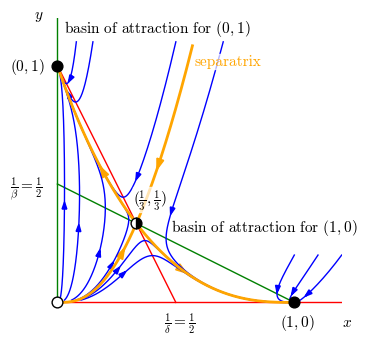

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4,4))

# axes.plot([0,1.2],[0,0],color='k',linewidth=1)
# axes.plot([0,0],[0,1.2],color='k',linewidth=1)
axes.plot([0,0.5],[1,0],color='r',linewidth=1)
axes.plot([0,1],[0.5,0],color='g',linewidth=1)
axes.plot([0,2],[0,0],color='r',linewidth=1)
axes.plot([0,0],[0,2],color='g',linewidth=1)

gamma=3
beta=2
delta=2

axes.axis('off')


axes.set_xlim([-0.1,1.2])
axes.set_ylim([-0.1,1.2])


bx=[0.01,0.03,0.06,0.08,0.09,0.1,0.15,0.08,0.5,0.7,1,1.1,1.2]
by=[0.01,0.01,0.01,0.01,0.01,0.01,1.1,1.1,1.1,1.1,0.2,0.2,0.2,1/3+0.001,1/3-0.001]

for i in range(13):
    x=np.zeros(1000)
    y=np.zeros(1000)
    x[0]=bx[i]
    y[0]=by[i]
    W=0.01
    for j in range(999):
        x[j+1]=x[j]+W*(x[j]*(1-x[j]-beta*y[j]))
        y[j+1]=y[j]+W*gamma*y[j]*(1-y[j]-delta*x[j])
    axes.plot(x,y,color='b',linewidth=1)
    if i<7:
        axes.arrow(x[150],y[150],x[151]-x[149],y[151]-y[149],width=0.001,length_includes_head=True,head_width=0.02,
                overhang=0,color='b')
    if i>6:
        axes.arrow(x[50],y[50],x[51]-x[49],y[51]-y[49],width=0.001,length_includes_head=True,head_width=0.02,
                overhang=0,color='b')
        
bx=[1/3-0.001,1/3+0.001]
by=[1/3-0.001,1/3+0.001]
for i in range(2):
    t=np.linspace(0,10,1000)
    t=t/1000
    xD=x*(1-x-beta*y)
    yD=gamma*y*(1-y-delta*x)
    x=np.zeros(1000)
    y=np.zeros(1000)
    x[0]=bx[i]
    y[0]=by[i]
    W=0.01
    for j in range(999):
        x[j+1]=x[j]-W*(x[j]*(1-x[j]-beta*y[j]))
        y[j+1]=y[j]-W*gamma*y[j]*(1-y[j]-delta*x[j])
    if i==1:
        axes.plot(x[:281],y[:281],color='orange',linewidth=2)
    if i==0:
        axes.plot(x,y,color='orange',linewidth=2)
    axes.arrow(x[250],y[250],x[249]-x[251],y[249]-y[251],width=0.003,length_includes_head=True,head_width=0.03,
                overhang=0,color='orange', zorder=1)
    
bx=[1/3+0.001,1/3-0.001]
by=[1/3-0.001,1/3+0.001]
for i in range(2):
    t=np.linspace(0,10,2000)
    t=t/2000
    xD=x*(1-x-beta*y)
    yD=gamma*y*(1-y-delta*x)
    x=np.zeros(2000)
    y=np.zeros(2000)
    x[0]=bx[i]
    y[0]=by[i]
    W=0.01
    for j in range(1999):
        x[j+1]=x[j]+W*(x[j]*(1-x[j]-beta*y[j]))
        y[j+1]=y[j]+W*gamma*y[j]*(1-y[j]-delta*x[j])
    axes.plot(x,y,color='orange',linewidth=2)
    axes.arrow(x[1000],y[1000],x[1001]-x[999],y[1001]-y[999],width=0.003,length_includes_head=True,head_width=0.03,
                overhang=0,color='orange', zorder=1)
    
axes.text(0.58,1,r'separatrix',fontsize=11,color='orange',zorder=2,bbox=dict(edgecolor='white',facecolor='white',alpha=0.7,pad=0.1))
axes.scatter(1,0,60, edgecolor='k', facecolor='k',zorder=2)  
axes.scatter(0,1,60, edgecolor='k', facecolor='k',zorder=2) 
axes.scatter(1/3,1/3,60, edgecolor='k', facecolor='k',zorder=2,  marker=MarkerStyle("o", fillstyle="right"))
axes.scatter(1/3,1/3,60, facecolor='white', edgecolor='black',zorder=2, marker=MarkerStyle("o", fillstyle="left"))
 
axes.scatter(0,0,60, edgecolor='k', facecolor='white',zorder=2)  
axes.text(0.48,0.3,r'basin of attraction for $(1,0)$',fontsize=11,color='k')
axes.text(0.03,1.14,r'basin of attraction for $(0,1)$',fontsize=11,color='k')
axes.text(0.45,-0.1,r'$\frac{1}{\delta}=\frac{1}{2}$',fontsize=11,color='k')
axes.text(-0.2,0.47,r'$\frac{1}{\beta}=\frac{1}{2}$',fontsize=11,color='k')
axes.text(-0.1,1.2,r'$y$',fontsize=11,color='k')
axes.text(1.2,-0.1,r'$x$',fontsize=11,color='k')
axes.text(-0.2,0.98,r'$(0,1)$',fontsize=11,color='k')
axes.text(0.94,-0.1,r'$(1,0)$',fontsize=11,color='k')
axes.text(0.32,0.42,r'$(\frac{1}{3},\frac{1}{3})$',fontsize=11,color='k',bbox=dict(edgecolor='white',facecolor='white',alpha=0.7,pad=0.1))

axes.set_aspect('equal')

if Save:
    fig.savefig(str(savedir / 'ch10_LotkaVolterra_FULL.pdf'), format='pdf', bbox_inches='tight')

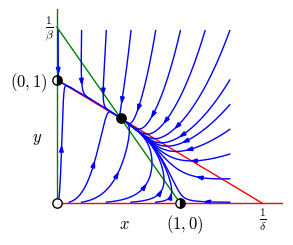

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(3,3))

gamma=3
beta=0.7
delta=0.6

axes.plot([0,1/delta],[1,0],color='r',linewidth=1)
axes.plot([0,1],[1/beta,0],color='g',linewidth=1)
axes.plot([0,2],[0,0],color='r',linewidth=1)
axes.plot([0,0],[0,2],color='g',linewidth=1)

bx=[0.01,0.2,0.4,0.6,0.8,1,1.2,1.4,1.4,1.4,1.4,1.4,1.4,1.4,0.01,0.2,0.4,0.6,0.8,0.1]
by=[1.4,1.4,1.4,1.4,1.4,1.4,1.4,1.4,1.0,0.8,0.6,0.4,0.2,0.01,0.01,0.01,0.01,0.01,0.01,0.01]

for i in range(20):
    t=np.linspace(0,10,1000)
    t=t/1000
    xD=x*(1-x-beta*y)
    yD=gamma*y*(1-y-delta*x)
    x=np.zeros(1000)
    y=np.zeros(1000)
    x[0]=bx[i]
    y[0]=by[i]
    W=0.01
    for j in range(999):
        x[j+1]=x[j]+W*(x[j]*(1-x[j]-beta*y[j]))
        y[j+1]=y[j]+W*gamma*y[j]*(1-y[j]-delta*x[j])
    axes.plot(x,y,color='b',linewidth=1)
    if i<14:
        axes.arrow(x[50],y[50],x[51]-x[49],y[51]-y[49],width=0.003,length_includes_head=True,head_width=0.03,
                overhang=0,color='b')
    if i>13:
        axes.arrow(x[150],y[150],x[151]-x[149],y[151]-y[149],width=0.003,length_includes_head=True,head_width=0.03,
                overhang=0,color='b')
         
axes.scatter(1,0,45, edgecolor='black', facecolor='black', zorder=2, marker=MarkerStyle("o", fillstyle="right"))  
axes.scatter(1,0,45, edgecolor='black', facecolor='white', zorder=2, marker=MarkerStyle("o", fillstyle="left"))  

axes.scatter(0,1,45, edgecolor='black', facecolor='black', zorder=2, marker=MarkerStyle("o", fillstyle="right"))
axes.scatter(0,1,45, edgecolor='black', facecolor='white', zorder=2, marker=MarkerStyle("o", fillstyle="left"))

axes.scatter((1-beta)/(1-beta*delta),(1-delta)/(1-beta*delta),45, edgecolor='k', facecolor='k', zorder=2)  
axes.scatter(0,0,45, edgecolor='k', facecolor='white', zorder=2)  

axes.text(1/delta-0.03,-0.16,r'$\frac{1}{\delta}$',fontsize=12,color='k')
axes.text(-0.1,1/beta-0.03,r'$\frac{1}{\beta}$',fontsize=12,color='k')
axes.text(-0.2,0.5,r'$y$',fontsize=12,color='k')
axes.text(0.5,-0.2,r'$x$',fontsize=12,color='k')
axes.text(-0.38,0.95,r'$(0,1)$',fontsize=12,color='k')
axes.text(0.88,-0.2,r'$(1,0)$',fontsize=12,color='k')

axes.axis('off')
axes.set_aspect('equal')
axes.set_xlim([-0.05,1.1*(1/delta)])
axes.set_ylim([-0.05,1.1*(1/beta)])

if Save:
    fig.savefig(str(savedir / 'ch10_LotkaVolterra_FULL2.pdf'), format='pdf', bbox_inches='tight')

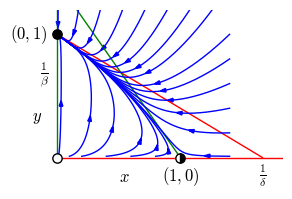

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(3,2))

axes.plot([0,1/delta],[1,0],color='r',linewidth=1)
axes.plot([0,1],[1/beta,0],color='g',linewidth=1)
axes.plot([0,2],[0,0],color='r',linewidth=1)
axes.plot([0,0],[0,2],color='g',linewidth=1)

gamma=3
beta=1.5
delta=0.6

bx=[0.01,0.2,0.4,0.6,0.8,1,1.2,1.4,1.4,1.4,1.4,1.4,1.4,1.4,0.01,0.2,0.4,0.6,0.8,0.1]
by=[1.4,1.4,1.4,1.4,1.4,1.4,1.4,1.4,1.0,0.8,0.6,0.4,0.2,0.01,0.01,0.01,0.01,0.01,0.01,0.01]

for i in range(20):
    t=np.linspace(0,10,1000)
    t=t/1000
    xD=x*(1-x-beta*y)
    yD=gamma*y*(1-y-delta*x)
    x=np.zeros(1000)
    y=np.zeros(1000)
    x[0]=bx[i]
    y[0]=by[i]
    W=0.01
    for j in range(999):
        x[j+1]=x[j]+W*(x[j]*(1-x[j]-beta*y[j]))
        y[j+1]=y[j]+W*gamma*y[j]*(1-y[j]-delta*x[j])
    axes.plot(x,y,color='b',linewidth=1)
    if i<14:
        axes.arrow(x[50],y[50],x[51]-x[49],y[51]-y[49],width=0.003,length_includes_head=True,head_width=0.03,
                overhang=0,color='b')
    if i>13:
        axes.arrow(x[150],y[150],x[151]-x[149],y[151]-y[149],width=0.003,length_includes_head=True,head_width=0.03,
                overhang=0,color='b')
         
axes.scatter(1,0,45, edgecolor='k', facecolor='black',zorder=3, marker=MarkerStyle("o", fillstyle="right"))
axes.scatter(1,0,45, edgecolor='k', facecolor='white',zorder=3, marker=MarkerStyle("o", fillstyle="left"))

axes.scatter(0,1,45, edgecolor='k', facecolor='k',zorder=3) 
# axes.scatter((1-beta)/(1-beta*delta),(1-delta)/(1-beta*delta),60, edgecolor='k', facecolor='k',zorder=3)  
axes.scatter(0,0,45, edgecolor='k', facecolor='white',zorder=3)  
axes.text(1/delta,-0.15,r'$\frac{1}{\delta}$',fontsize=12,color='k',horizontalalignment='center',verticalalignment='center')
axes.text(-0.1,1/beta,r'$\frac{1}{\beta}$',fontsize=12,color='k',horizontalalignment='center',verticalalignment='center')
axes.text(-0.2,0.3,r'$y$',fontsize=12,color='k')
axes.text(0.5,-0.2,r'$x$',fontsize=12,color='k')
axes.text(-0.23,1,r'$(0,1)$',fontsize=12,color='k',horizontalalignment='center',verticalalignment='center')
axes.text(1,-0.15,r'$(1,0)$',fontsize=12,color='k',horizontalalignment='center',verticalalignment='center')

axes.axis('off')

axes.set_aspect('equal')
axes.set_xlim([-0.05,1.1*(1/delta)])
axes.set_ylim([-0.05,max(1.1*(1/beta),1.2)])

if Save:
    fig.savefig(str(savedir / 'ch10_LotkaVolterra_FULL3.pdf'), bbox_inches='tight')

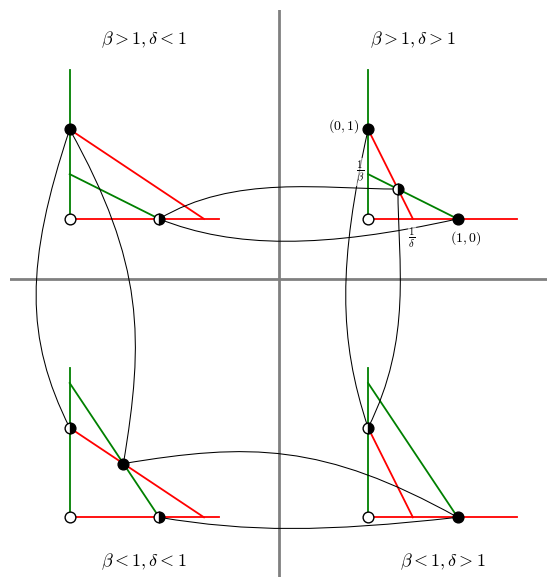

In [23]:
from matplotlib import patches

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,6))

axes.plot([-2,2],[0.1,0.1],color='gray',linewidth=2)
axes.plot([-0.1,-0.1],[-2,2],color='gray',linewidth=2)

axes.text(-1,1.7,r'$\beta>1,\delta<1$',fontsize=13,color='k', va='center', ha='center')
axes.text(-1,-1.8,r'$\beta<1,\delta<1$',fontsize=13,color='k', va='center', ha='center')
axes.text(0.8,1.7,r'$\beta>1,\delta>1$',fontsize=13,color='k', va='center', ha='center')
axes.text(1,-1.8,r'$\beta<1,\delta>1$',fontsize=13,color='k', va='center', ha='center')

axes.scatter(0.5,0.5,60,edgecolor='black',facecolor='white', zorder=3)
axes.scatter(-1.5,0.5,60,edgecolor='black',facecolor='white', zorder=3)
axes.scatter(0.5,-1.5,60,edgecolor='black',facecolor='white', zorder=3)
axes.scatter(-1.5,-1.5,60,edgecolor='black',facecolor='white', zorder=3)
axes.scatter(0.7,0.7,60, 'black', marker=MarkerStyle("o", fillstyle="right"), zorder=3)
axes.scatter(0.7,0.7,60, 'w', edgecolor="black", marker=MarkerStyle("o", fillstyle="left"), zorder=3)
axes.scatter(0.5,1.1,60,edgecolor='black',facecolor='black', zorder=3)
axes.scatter(1.1,0.5,60,edgecolor='black',facecolor='black', zorder=3)
axes.plot([0.5,1.1],[0.8,0.5],color='g',linewidth=1.3)
axes.plot([0.5,0.8],[1.1,0.5],color='r',linewidth=1.3)
axes.plot([0.5,0.5],[0.5,1.5],color='g',linewidth=1.3)
axes.plot([0.5,1.5],[0.5,0.5],color='r',linewidth=1.3)

axes.text(0.77,0.35,r'$\frac{1}{\delta}$',fontsize=11,color='k',bbox=dict(boxstyle="round,pad=0.03", edgecolor="none", facecolor="white",alpha=0.6), zorder=3)
axes.text(0.42,0.8,r'$\frac{1}{\beta}$',fontsize=11,color='k',bbox=dict(boxstyle="round,pad=0.03", edgecolor="none", facecolor="white", alpha=0.6), zorder=3)
axes.text(1.05,0.35,r'$(1,0)$',fontsize=10,color='k')
axes.text(0.23,1.1,r'$(0,1)$',fontsize=10,color='k')

axes.scatter(-0.9,0.5,60, 'black', marker=MarkerStyle("o", fillstyle="right"), zorder=3)
axes.scatter(-0.9,0.5,60, 'w', edgecolor="black", marker=MarkerStyle("o", fillstyle="left"), zorder=3)
axes.scatter(-1.5,1.1,60,edgecolor='black',facecolor='black', zorder=3)
axes.plot([-1.5,-0.6],[1.1,0.5],color='r',linewidth=1.3)
axes.plot([-1.5,-0.9],[0.8,0.5],color='g',linewidth=1.3)
axes.plot([-1.5,-0.5],[.5,.5],color='r',linewidth=1.3)
axes.plot([-1.5,-1.5],[1.5,0.5],color='g',linewidth=1.3)

axes.scatter(0.5,-0.9,60, 'black', marker=MarkerStyle("o", fillstyle="right"), zorder=3)
axes.scatter(0.5,-0.9,60, 'w', edgecolor="black", marker=MarkerStyle("o", fillstyle="left"), zorder=3)
axes.scatter(1.1,-1.5,60,edgecolor='black',facecolor='black', zorder=3)
axes.plot([0.5,0.8],[-0.9,-1.5],color='r',linewidth=1.3)
axes.plot([0.5,1.1],[-0.6,-1.5],color='g',linewidth=1.3)
axes.plot([0.5,0.5],[-.5,-1.5],color='g',linewidth=1.3)
axes.plot([0.5,1.5],[-1.5,-1.5],color='r',linewidth=1.3)

axes.scatter(-1.5,-0.9,60, 'black', marker=MarkerStyle("o", fillstyle="right"),  zorder=3)
axes.scatter(-1.5,-0.9,60, 'w', edgecolor="black", marker=MarkerStyle("o", fillstyle="left"),  zorder=3)
axes.scatter(-0.9,-1.5,60, 'black', marker=MarkerStyle("o", fillstyle="right"),  zorder=3)
axes.scatter(-0.9,-1.5,60, 'w', edgecolor="black", marker=MarkerStyle("o", fillstyle="left"), zorder=3)
axes.scatter(-1.14,-1.14,60,edgecolor='black',facecolor='black', zorder=3)
axes.plot([-1.5,-0.6],[-0.9,-1.5],color='r',linewidth=1.3)
axes.plot([-1.5,-0.9],[-0.6,-1.5],color='g',linewidth=1.3)
axes.plot([-1.5,-1.5],[-0.5,-1.5],color='g',linewidth=1.3)
axes.plot([-1.5,-0.5],[-1.5,-1.5],color='r',linewidth=1.3)

from matplotlib.path import Path

verts = [(0.7, 0.7),(0.2, 0.7),(-0.4, 0.8),(-0.9, 0.5)]
codes = [Path.MOVETO,Path.CURVE4,Path.CURVE4,Path.CURVE4]
path = Path(verts, codes)
patch = patches.PathPatch(path, facecolor='none', lw=0.75, zorder=2)
axes.add_patch(patch)

verts = [(1.1, 0.5),(0.2, 0.3),(-0.4, 0.3),(-0.9, 0.5)]
path = Path(verts, codes)
patch = patches.PathPatch(path, facecolor='none', lw=0.75, zorder=2)
axes.add_patch(patch)

verts = [(0.7, 0.7),(0.7, 0.2),(0.8, -0.3),(0.5, -0.9)]
path = Path(verts, codes)
patch = patches.PathPatch(path, facecolor='none', lw=0.75, zorder=2)
axes.add_patch(patch)

verts = [(0.5, 1.1),(0.3, 0.2),(0.3, -0.3),(0.5, -0.9)]
path = Path(verts, codes)
patch = patches.PathPatch(path, facecolor='none', lw=0.75, zorder=2)
axes.add_patch(patch)

verts = [(-1.5, 1.1),(-1.8, 0.2),(-1.8, -0.3),(-1.5, -0.9)]
path = Path(verts, codes)
patch = patches.PathPatch(path, facecolor='none', lw=0.75, zorder=2)
axes.add_patch(patch)

verts = [(-1.5, 1.1),(-1., 0.2),(-1., -0.3),(-1.14, -1.14)]
path = Path(verts, codes)
patch = patches.PathPatch(path, facecolor='none', lw=0.75, zorder=2)
axes.add_patch(patch)

verts = [(1.1, -1.5),(0.2, -1),(-0.3, -1),(-1.14, -1.14)]
path = Path(verts, codes)
patch = patches.PathPatch(path, facecolor='none', lw=0.75, zorder=2)
axes.add_patch(patch)

verts = [(1.1, -1.5),(0.2, -1.6),(-0.3, -1.6),(-0.9, -1.5)]
path = Path(verts, codes)
patch = patches.PathPatch(path, facecolor='none', lw=0.75, zorder=2)
axes.add_patch(patch)


axes.set_aspect('equal')
axes.axis('off')
axes.set_xlim([-1.9,1.7])
axes.set_ylim([-1.9,1.9]);

fig.tight_layout()
        
if Save:
    fig.savefig(str(savedir / 'ch10_rabbit_sheep_bifurcations.pdf'), bbox_inches='tight');
    fig.savefig(str(savedir / 'ch10_rabbit_sheep_bifurcations.svg'), bbox_inches='tight');

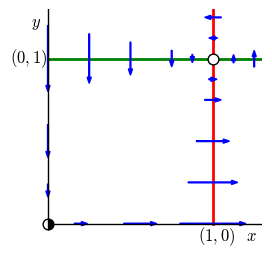

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(3,3))

axes.plot([0,1.3],[0,0],color='k',linewidth=1)
axes.plot([0,0],[0,1.3],color='k',linewidth=1)
axes.plot([1,1],[0,1.3],color='r',linewidth=2, zorder=1)
axes.plot([0,1.3],[1,1],color='g',linewidth=2, zorder=1)

axes.axis('off')
axes.set_xlim([-0.1,1.3])
axes.set_ylim([-0.1,1.3])

axes.scatter(1,1,60, edgecolor='k', facecolor='white',zorder=2)
axes.scatter(0,0,60, 'k', marker=MarkerStyle("o", fillstyle="right"), zorder=2)
axes.scatter(0,0,60, 'w', edgecolor="k", marker=MarkerStyle("o", fillstyle="left"), zorder=2)

axes.text(-0.1,1.2,r'$y$',fontsize=12,color='k')
axes.text(1.2,-0.1,r'$x$',fontsize=12,color='k')
axes.text(-0.23,0.98,r'$(0,1)$',fontsize=12,color='k')
axes.text(0.91,-0.1,r'$(1,0)$',fontsize=12,color='k')

gamma=1

head_width = 0.025
width = 0.005
for i in range(6):
    axes.arrow(i*0.25,1-0.2*(gamma*(i*0.25-1)),0,0.4*gamma*(i*0.25-1),width=width,length_includes_head=True,head_width=head_width,
                overhang=0,color='b')
for i in range(6):
    axes.arrow(1-0.2*(1-0.25*i),0.25*i,0.4*(1-0.25*i),0,width=width,length_includes_head=True,head_width=head_width,
                overhang=0,color='b')    

axes.arrow(1-0.2*(1-0.875),0.875,0.4*(1-0.875),0,width=width,length_includes_head=True,head_width=head_width,
                overhang=0,color='b') 
axes.arrow(1-0.2*(1-1.125),1.125,0.4*(1-1.125),0,width=width,length_includes_head=True,head_width=head_width,
                overhang=0,color='b') 
axes.arrow(0.875,1-0.2*gamma*(0.875-1),0,0.4*gamma*(0.875-1),width=width,length_includes_head=True,head_width=head_width,
                overhang=0,color='b') 
axes.arrow(1.125,1-0.2*gamma*(1.125-1),0,0.4*gamma*(1.125-1),width=width,length_includes_head=True,head_width=head_width,
                overhang=0,color='b') 
axes.arrow(0,0.5-0.2*gamma*0.5*(0-1),0,0.4*gamma*0.5*(0-1),width=width,length_includes_head=True,head_width=head_width,
                overhang=0,color='b') 
axes.arrow(0,0.2-0.2*gamma*0.2*(0-1),0,0.4*gamma*0.2*(0-1),width=width,length_includes_head=True,head_width=head_width,
                overhang=0,color='b') 
axes.arrow(0.5-0.2*0.2*(1-0),0,0.4*0.5*(1-0),0,width=width,length_includes_head=True,head_width=head_width,
                overhang=0,color='b') 
axes.arrow(0.2-0.2*0.2*(1-0),0,0.4*0.2*(1-0),0,width=width,length_includes_head=True,head_width=head_width,
                overhang=0,color='b') 
    
axes.set_aspect('equal')

if Save:
    fig.savefig(str(savedir / 'ch10_predator_prey.pdf'), bbox_inches='tight');
    fig.savefig(str(savedir / 'ch10_predator_prey.svg'), bbox_inches='tight');

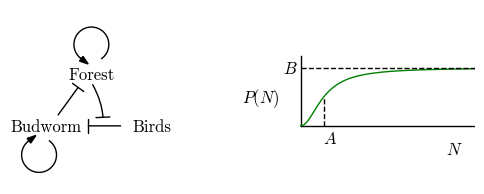

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,3))

axes.plot([0,3],[0,0],color='k',linewidth=1)
axes.plot([0,0],[0,1.2],color='k',linewidth=1)

axes.axis('off')
axes.set_xlim([-5,3])
axes.set_ylim([-1,2])

x=np.linspace(0,3,100)
A=0.4
B=1
y=B*x**2/(A**2+x**2)
plt.plot(x,y,color='g',linewidth=1)

axes.text(-1,0.4,r'$P ( N )$',fontsize=12,color='k')
axes.text(2.5,-0.5,r'$N$',fontsize=12,color='k')
axes.text(0.95*A,-0.3,r'$A$',fontsize=12,color='k')
axes.text(-0.3,0.9*B,r'$B$',fontsize=12,color='k')
axes.plot([0,3],[B,B],color='k',linewidth=1,linestyle = 'dashed')
axes.plot([A,A],[0,0.5],color='k',linewidth=1,linestyle = 'dashed')

axes.text(-4,0.8,r'Forest',fontsize=12,color='k')
axes.text(-5,-0.1,r'Budworm',fontsize=12,color='k')
axes.text(-2.9,-0.1,r'Birds',fontsize=12,color='k')


import matplotlib.patches as patches

axes.add_patch(patches.FancyArrowPatch(posA=(-3.05, 0), posB=(-3.7, 0),
                                          lw=1, arrowstyle=u'|-|, widthA=0, widthB=1',
                                          mutation_scale=5))
axes.add_patch(patches.FancyArrowPatch(posA=(-4.2, 0.15), posB=(-3.8, 0.7),
                                          lw=1, arrowstyle=u'|-|, widthA=0, widthB=1',
                                          mutation_scale=5))
axes.add_patch(patches.FancyArrowPatch(posA=(-3.6, 0.75), posB=(-3.4, 0.1), connectionstyle="angle3,angleA=120,angleB=90",
                                          lw=1, arrowstyle=u'|-|, widthA=0, widthB=1',
                                          mutation_scale=5))

R=0.3
ts=np.linspace(0,6.3,100)
xs=R*np.sin(ts)
ys=R*np.cos(ts)

axes.plot(xs[10:90]-4.5,ys[10:90]-0.5,color='k',linewidth=1,zorder=0)
axes.arrow(xs[88]-4.5,ys[88]-0.5,xs[89]-xs[88],ys[89]-ys[88],width=0.001,head_width=0.1,overhang=0,color='k',zorder=2)

axes.plot(xs[10:90]-3.6,-ys[10:90]+1.4,color='k',linewidth=1,zorder=0)
axes.arrow(xs[88]-3.6,-ys[88]+1.4,xs[89]-xs[88],ys[88]-ys[89],width=0.001,head_width=0.1,overhang=0,color='k',zorder=2)

axes.set_aspect('equal')

if Save:
    fig.savefig(str(savedir / 'ch10_forest_budworms.pdf'), dpi=600, format='pdf', bbox_inches='tight');

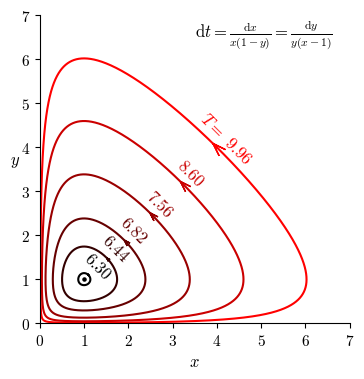

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,4))
dt=0.00005
xs=[4,3.2,2.5,1.9,1.5,1.1]
ys=[4,3.2,2.5,1.9,1.5,1.1]
N=[199120,171950,151100,136350,128840,126000]

for k in range(6):

    
    x=np.zeros((N[k]))
    y=np.zeros((N[k]))

    x[0]=xs[k]
    y[0]=ys[k]

    for i in range(N[k]-1):
        x[i+1]=x[i]+dt*(x[i]*(1-y[i]))
        y[i+1]=y[i]+dt*(y[i]*(x[i]-1))
    ax.plot(x,y,color=[1-k/5,0,0])
    ax.arrow(x[-1],y[-1],-0.02,0.02,width=0.001,length_includes_head=True,head_width=0.2-k*0.18/5,
                overhang=1,color=[1-k/5,0,0])
    if k==0:
        ax.text(x[0]+.2,y[0]+.2,r'$T =$ {:.2f}'.format(N[k]*dt),fontsize=12,color=[1-k/5,0,0],rotation=-45, ha='center', va='center')
    else:
        ax.text(x[0]+.2,y[0]+.2,r'{:.2f}'.format(N[k]*dt),fontsize=12,color=[1-k/5,0,0],rotation=-45, ha='center', va='center')

ax.scatter(1,1,5,'k')

ax.text(3.5,6.5,r'$\mathrm{d}t=\frac{\mathrm{d}x}{x(1-y)}=\frac{\mathrm{d}y}{y(x-1)}$',fontsize=12,color='k',rotation=0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('$x$',fontsize=12)
ax.set_ylabel('$y$',fontsize=12, rotation=0)
ax.set_xlim([0,7])
ax.set_ylim([0,7])
ax.set_xticks([0,1,2,3,4,5,6,7])
ax.set_yticks([0,1,2,3,4,5,6,7])

if Save:
    fig.savefig(str(savedir / 'Pred-prey-soln.pdf'), bbox_inches='tight');
    fig.savefig(str(savedir / 'Pred-prey-soln.svg'), bbox_inches='tight');

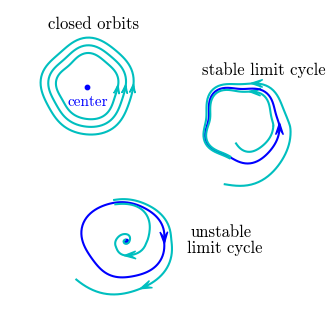

In [27]:
import random

def RPsmooth(x):
    x2=np.zeros(x.shape[0]+2)
    y=np.zeros(x.shape)
    x2[1:-1]=x
    x2[0]=x[-1]
    x2[-1]=x[0]
    for i in range(len(x)):
        y[i]=np.sum(x2[(i):(i+3)])/3
    return y

def RPsmooth2(x):
    y1=np.copy(x)
    y2=np.copy(x)
    for i in range(len(x)-2):
        y1[i+1]=np.sum(x[i:(i+3)])/3
    for i in range(len(x)-2):
        y2[i+1]=np.sum(y1[i:(i+3)])/3
    return y2

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,4))
ax.set_aspect('equal')
ax.set_xlim([0,8])
ax.set_ylim([-2,6])
ax.axis('off')

random.seed(11)
theta=np.linspace(0,2*np.pi,100)
r=np.zeros(theta.shape)
for i in range(10):
    r=r+(random.random()-0.5)*np.sin((i+1)*theta/2)/10

ax.scatter(2,4,10,'b')  
ax.text(1.5,3.5,r'center',fontsize=11,color='b')
ax.text(1,5.5,r'closed orbits',fontsize=12,color='k')

for i in range(1,4):
    r2=r+0.6+i*0.2    
    x=RPsmooth(r2)*np.cos(theta)
    y=RPsmooth(r2)*np.sin(theta)
    ax.plot(2+x,4+y,'c')
    ax.arrow(2+x[-1],4+y[-1],x[-1]-x[-2],y[-1]-y[-2],width=0.001,length_includes_head=True,head_width=0.15,
                overhang=0.5,color='c')

random.seed(1)
theta=np.linspace(0,2*np.pi,100)
r=np.zeros(theta.shape)
for i in range(10):
    r=r+(random.random()-0.5)*np.sin((i+1)*theta/2)/10
r=RPsmooth(r+1)
x=r*np.cos(theta)
y=r*np.sin(theta)
ax.plot(6+x,3+y,'b')
ax.arrow(6+x[-1],3+y[-1],x[-1]-x[-2],y[-1]-y[-2],width=0.001,length_includes_head=True,head_width=0.2,
                overhang=0.5,color='b')

theta2=np.zeros(theta.shape)
theta2[:30]=theta[-30:]
theta2[30:]=theta[:70]
tr=np.zeros(theta.shape)
tr[:30]=r[-30:]
tr[30:]=r[:70]

r2=np.zeros(r.shape)
r2=np.sqrt(np.exp(-theta))
r2=r2/np.max(r2)
r3=tr-0.4*r2
x=r3*np.cos(theta2)
y=r3*np.sin(theta2)
ax.plot(6+x,3+y,'c')
ax.arrow(6+x[50],3+y[50],x[50]-x[49],y[50]-y[49],width=0.001,length_includes_head=True,head_width=0.2,
                overhang=0.5,color='c')

r4=tr+0.7*r2
x=r4*np.cos(theta2)
y=r4*np.sin(theta2)
ax.plot(6+RPsmooth2(x),3+RPsmooth2(y),'c')
ax.arrow(6+x[50],3+y[50],x[50]-x[49],y[50]-y[49],width=0.001,length_includes_head=True,head_width=0.2,
                overhang=0.5,color='c')
ax.text(5,4.3,r'stable limit cycle',fontsize=12,color='k')


random.seed(2)
theta=np.linspace(0,2*np.pi,100)
r=np.zeros(theta.shape)
for i in range(10):
    r=r+(random.random()-0.5)*np.sin((i+1)*theta/2)/10
r=RPsmooth(RPsmooth(r+1))
x=r*np.cos(theta)
y=r*np.sin(theta)
ax.plot(3+x,0+y,'b')
ax.arrow(3+x[-1],0+y[-1],x[-2]-x[-1],y[-2]-y[-1],width=0.001,length_includes_head=True,head_width=0.2,
                overhang=0.5,color='b')
ax.scatter(3,0,10,'b')  

theta2=np.zeros(theta.shape)
theta2[:70]=theta[-70:]
theta2[70:]=theta[:30]
tr=np.zeros(theta.shape)
tr[:70]=r[-70:]
tr[70:]=r[:30]


theta3=np.concatenate((theta2,theta2))
tr2=np.concatenate((tr,tr))
g=np.linspace(0,20,200)
r5=np.exp(-g/6)
r3=tr2*0.95*r5

x=RPsmooth2(r3*np.cos(np.flip(theta3)))
y=RPsmooth2(r3*np.sin(np.flip(theta3)))
ax.plot(3+x,0+y,'c')
ax.arrow(3+x[50],0+y[50],x[55]-x[49],y[55]-y[49],width=0.001,length_includes_head=True,head_width=0.2,
                overhang=0.5,color='c')

r2=np.sqrt(np.exp(-theta))
r2=r2/np.max(r2)
r4=tr+1.7*r2
x=r4*np.cos(theta2)
y=r4*np.sin(theta2)
x=RPsmooth2(x)
y=RPsmooth2(y)
ax.plot(3+x[30:],y[30:],'c')
ax.arrow(3+x[50],0+y[50],x[49]-x[50],y[49]-y[50],width=0.001,length_includes_head=True,head_width=0.2,
                overhang=0.5,color='c')
ax.text(4.7,0.1,r'unstable',fontsize=12,color='k')
ax.text(4.6,-0.3,r'limit cycle',fontsize=12,color='k')

if Save:
    fig.savefig(str(savedir / '2D-closed.pdf'), format='pdf', bbox_inches='tight');
    fig.savefig(str(savedir / '2D-closed.svg'), format='pdf', bbox_inches='tight');

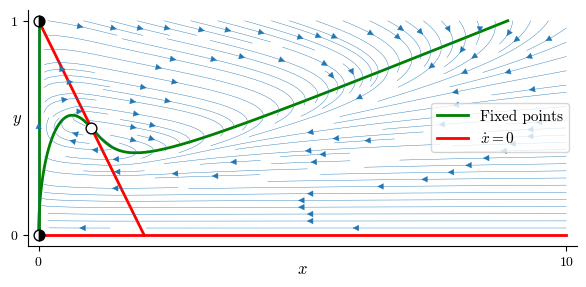

In [28]:
def Budworm3(k=10,b=1,c=.5,e=0.01,xmax=10,ymax=1):
    y=np.linspace(0.01,1,1000)
    x=np.linspace(k*0.01,k,1000)

    def Vel(X,t=0):
        x,y=X
        return [x*(1-x/k/y)-b*x**2/(x**2+y**2),e*y*(1-y-c*x)]

    # fixed points on the axes
    FP=[[0,0],[0,1]] # array of [x,y] values
    # center fixed points
    r=np.roots([-k*c**3-k*c-c**2-1,3*k*c**2+k+2*c+b*k*c,-3*k*c-1-b*k,k])
    for X in r[np.isreal(r)].real:
        FP+=[[X,1-c*X]]
    FP=np.array(FP)
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,3))
    
    # nullcline for x
    NX=[] # array of [x,y] values
    for Y in y:
        r=np.roots([1/k/Y,-1,Y/k+b,-Y**2])
        for X in r[np.isreal(r)].real:
            NX+=[[X,Y]]
    NX=np.array(NX)
    NX=NX[np.argsort(NX[:,0]),:] # sort by x-value
    plot(NX[:,0],NX[:,1],fmts=['g-'],linewidth=2,axes=ax);
    # nullcline for y
    plot([0,1/c],[1,0],fmts=['r-'],linewidth=2,axes=ax,
        legend=['Fixed points','$\dot x = 0$','$\dot y = 0$'],loc='center right');
    # nullclines on the axes
    plot([0,xmax],[0,0],fmts=['r-'],linewidth=2,axes=ax);
    plot([0,0],[1,0],fmts=['g-'],linewidth=2,axes=ax,
        ylim=[-ymax*0.02,ymax*1.02],xlim=[-xmax*0.02,xmax*1.02]);

    # plot streamlines
    X,Y=np.meshgrid(np.linspace(0,xmax,30),np.linspace(ymax/30,ymax,30))                          # create a grid
    VX,VY=Vel([X,Y])                              # compute velocity on the grid
    start=[[3,0.2]]                             # initial conditions for a special stream
    ax.streamplot(X,Y,VX,VY,linewidth=.3,density=(2,1),minlength=0.1);        # add lots of stream lines
    
    # saddle points
    ax.scatter(FP[:2,0],FP[:2,1],60, facecolor='white', edgecolor='black',zorder=2, 
             marker=MarkerStyle("o",fillstyle="left"),label='_nolegend_')
    ax.scatter(FP[:2,0],FP[:2,1],60, facecolor='black', edgecolor='black',zorder=2, 
             marker=MarkerStyle("o",fillstyle="right"),label='_nolegend_')
    # other fixed points
    ax.scatter(FP[2:,0],FP[2:,1],60, edgecolor='k', facecolor='w',zorder=2,  marker=MarkerStyle("o", fillstyle="full"))

    
    ax.set_xlim([-0.2,xmax+0.2])
    ax.set_ylim([-0.05,ymax+0.05])
    
    ax.set_xlabel('$x$',fontsize=12,labelpad=-5)
    ax.set_ylabel('$y$',fontsize=12,labelpad=-5, rotation=0)
    ax.set_xticks([0,xmax])
    ax.set_yticks([0,ymax])
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    fig.tight_layout()
    
    if Save:
        fig.savefig(str(savedir / 'dyn-budworm-phase-wide.pdf'), bbox_inches='tight');
        fig.savefig(str(savedir / 'dyn-budworm-phase-wide.svg'), bbox_inches='tight');


Budworm3(k=10,b=1,c=.5,e=0.05,xmax=10,ymax=1);

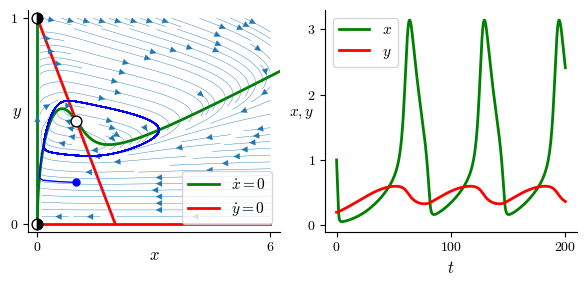

In [29]:
from scipy import integrate

c=2 # the sole parameter \gamma in the non-dimensionalized predator prey system

def Vel(X,t=0):
    '''
    Return the velocity given the position X = [x,y].
    The t-variable is passed but not used in this case
    '''
    return np.array([X[0]*(1-X[1]),c*X[1]*(X[0]-1)])

def Jac(X):
    '''
    Return the Jacobian matrix evaluated in X = [x,y].
    '''
    return np.array([[1-X[1],-X[0]],[c*X[1],c*(X[0]-1)]])



def Budworm5(k=10,b=1,c=.5,e=0.01,xmax=4,ymax=1,tmax=1000):
    y=np.linspace(0.01,1,1000)
    x=np.linspace(k*0.01,k,1000)

    def Vel(X,t=0):
        x,y=X
        return [x*(1-x/k/y)-b*x**2/(x**2+y**2),e*y*(1-y-c*x)]

    # fixed points on the axes
    FP=[[0,0],[0,1]] # array of [x,y] values
    # center fixed points
    r=np.roots([-k*c**3-k*c-c**2-1,3*k*c**2+k+2*c+b*k*c,-3*k*c-1-b*k,k])
    for X in r[np.isreal(r)].real:
        FP+=[[X,1-c*X]]
    FP=np.array(FP)
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6,3))
    ax=axes[0]
    
    # nullcline for x
    NX=[] # array of [x,y] values
    for Y in y:
        r=np.roots([1/k/Y,-1,Y/k+b,-Y**2])
        for X in r[np.isreal(r)].real:
            NX+=[[X,Y]]
    NX=np.array(NX)
    NX=NX[np.argsort(NX[:,0]),:] # sort by x-value
    plot(NX[:,0],NX[:,1],fmts=['g-'],linewidth=2,axes=ax);
    # nullcline for y
    plot([0,1/c],[1,0],fmts=['r-'],linewidth=2,axes=ax,
        legend=['$\dot x = 0$','$\dot y = 0$'],loc='lower right');
    # nullclines on the axes
    plot([0,xmax],[0,0],fmts=['r-'],linewidth=2,axes=ax);
    plot([0,0],[1,0],fmts=['g-'],linewidth=2,axes=ax);

    # plot streamlines
    X,Y=np.meshgrid(np.linspace(0,xmax,30),np.linspace(ymax/30,ymax,30))                          # create a grid
    VX,VY=Vel([X,Y])                              # compute velocity on the grid
    start=[[3,0.2]]                             # initial conditions for a special stream
    ax.streamplot(X,Y,VX,VY,linewidth=.3,density=(2,1),minlength=0.1);        # add lots of stream lines
    
    # add one trajectory
    t=np.linspace(0,1000,1000)                        # time axis
    X0=np.array([1,0.2])                          # initial condition
    X=integrate.odeint(Vel,X0,t) # integrate the equations
    plot([X0[0]],[X0[1]],fmts=['bo'],axes=ax);
    plot(X[:,0],X[:,1],fmts=['b-'],linewidth=1,
        ylim=[-ymax*0.02,ymax*1.02],xlim=[-xmax*0.02,xmax*1.02],
        axes=ax);
    
    # saddle points
    ax.scatter(FP[:2,0],FP[:2,1],60, facecolor='white', edgecolor='black',zorder=2, 
             marker=MarkerStyle("o",fillstyle="left"),label='_nolegend_')
    ax.scatter(FP[:2,0],FP[:2,1],60, facecolor='black', edgecolor='black',zorder=2, 
             marker=MarkerStyle("o",fillstyle="right"),label='_nolegend_')
    # other fixed points
    ax.scatter(FP[2:,0],FP[2:,1],60, edgecolor='k', facecolor='w',zorder=2,  marker=MarkerStyle("o", fillstyle="full"))
    
    ax.set_xlabel('$x$',fontsize=12,labelpad=-5)
    ax.set_ylabel('$y$',fontsize=12,labelpad=-5, rotation=0)
    ax.set_xticks([0,xmax])
    ax.set_yticks([0,ymax])
    ax.set_xlim([-xmax*0.04,xmax*1.04])
    ax.set_ylim([-ymax*0.04,ymax*1.04])
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # ax.text(-0.1, 1.1, 'A', transform=ax.transAxes,
    #             fontsize=16, fontweight='bold', va='top', ha='right')

    
    ax=axes[1]
    # plot one trajectory x and y vs t
    t=np.linspace(0,tmax,1000)                        # time axis
    X0=np.array([1,0.2])                          # initial condition
    X=integrate.odeint(Vel,X0,t) # integrate the equations
    plot(t,[X[:,0],X[:,1]],fmts=['g-','r-'],figsize=(4,3),
        xlabel='$t$',legend=['$x$','$y$'],axes=ax);
    ax.set_xticks([0,100,200])
    ax.set_yticks([0,1,2,3])
    ax.set_ylabel('$x,y$', rotation=0)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    if Save:
        fig.savefig(str(savedir / 'dyn-budworm-osc.pdf'), bbox_inches='tight');
        fig.savefig(str(savedir / 'dyn-budworm-osc.svg'), bbox_inches='tight');

Budworm5(k=10,b=1,c=.5,e=0.05,xmax=6,ymax=1,tmax=200)

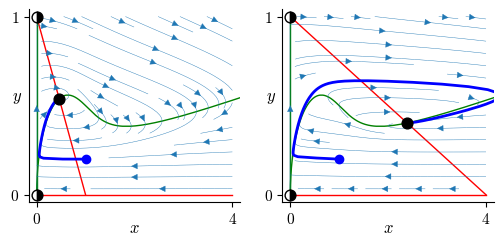

In [30]:
def Budworm6(ax,k=10,b=1,c=.5,e=0.01,xmax=4,ymax=1,tmax=1000):

    def Vel(X,t=0):
        x,y=X
        return [x*(1-x/k/y)-b*x**2/(x**2+y**2),e*y*(1-y-c*x)]

    def Jac(X):
        x,y=X
        return np.array([[1-2*x/k/y-2*b*x*y**2/(x**2+y**2)**2,x**2/k/y**2+b*x**2*2*y/(x**2+y**2)**2],
                         [-c*e*y,e*(1-2*y-c*x)]])

    

    # nullcline for x
    NX=[] # array of [x,y] values
    for Y in np.linspace(0.01,ymax,1000):
        r=np.roots([1/k/Y,-1,Y/k+b,-Y**2])
        for X in r[np.isreal(r)].real:
            NX+=[[X,Y]]
    NX=np.array(NX)
    NX=NX[np.argsort(NX[:,0]),:] # sort by x-value
    ax.plot(NX[:,0],NX[:,1], 'g-',linewidth=1);
    
    # nullcline for y
    ax.plot([0,1/c],[1,0], 'r-', linewidth=1);
    # nullclines on the axes
    ax.plot([0,xmax],[0,0], 'r-', linewidth=1);
    ax.plot([0,0],[1,0],'g-', linewidth=1);
    
    # plot streamlines
    X,Y=np.meshgrid(np.linspace(0,xmax,30),np.linspace(ymax/30,ymax,30))                          # create a grid
    VX,VY=Vel([X,Y])                              # compute velocity on the grid
    start=[[3,0.2]]                             # initial conditions for a special stream
    ax.streamplot(X,Y,VX,VY,linewidth=.3,density=(1,0.5),minlength=0.1);        # add lots of stream lines

    # add one trajectory
    t=np.linspace(0,1000,1000)                        # time axis
    X0=np.array([1,0.2])                          # initial condition
    X=integrate.odeint(Vel,X0,t) # integrate the equations
    ax.plot([X0[0]],[X0[1]], 'bo');
    ax.plot(X[:,0],X[:,1],'b-',linewidth=2);
    
    # fixed points on the axes
    FP=[[0,0],[0,1]] # array of [x,y] values
    # center fixed points
    r=np.roots([-k*c**3-k*c-c**2-1,3*k*c**2+k+2*c+b*k*c,-3*k*c-1-b*k,k])
    for X in r[np.isreal(r)].real:
        fp=[X,1-c*X]
        FP+=[fp]
    FP=np.array(FP)
    
    # saddle points
    ax.scatter(FP[:2,0],FP[:2,1],60, facecolor='white', edgecolor='black',zorder=2, 
             marker=MarkerStyle("o",fillstyle="left"),label='_nolegend_')
    ax.scatter(FP[:2,0],FP[:2,1],60, facecolor='black', edgecolor='black',zorder=2, 
             marker=MarkerStyle("o",fillstyle="right"),label='_nolegend_')
    # other fixed points
    ax.scatter(FP[2:,0],FP[2:,1],60, edgecolor='k', facecolor='k',zorder=2,  marker=MarkerStyle("o", fillstyle="full"))
    
    
    ax.set_xlabel('$x$',fontsize=12,labelpad=-5)
    ax.set_ylabel('$y$',fontsize=12,labelpad=-5, rotation=0)
    ax.set_xticks([0,xmax])
    ax.set_yticks([0,ymax])
    ax.set_xlim([-xmax*0.04,xmax*1.04])
    ax.set_ylim([-ymax*0.04,ymax*1.04])
    
    
 
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(6,2.5))
ax=axs[0]
Budworm6(ax,k=10,b=1,c=1,e=0.05,xmax=4,ymax=1,tmax=1000)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax=axs[1]
Budworm6(ax,k=10,b=1,c=.25,e=0.05,xmax=4,ymax=1,tmax=1000)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

if Save:
    fig.savefig(str(savedir / 'dyn-budworm-lowhigh.pdf'), bbox_inches='tight');
    fig.savefig(str(savedir / 'dyn-budworm-lowhigh.svg'), bbox_inches='tight');

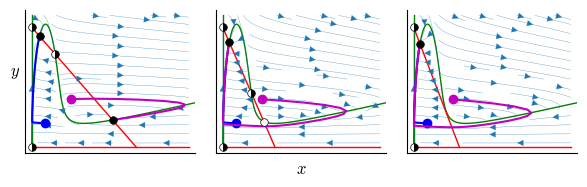

In [43]:
def Budworm7(ax,k=10,b=1,c=.5,e=0.01,xmax=4,ymax=1,tmax=1000):

    def Vel(X,t=0):
        x,y=X
        return np.array([x*(1-x/k/y)-b*x**2/(x**2+y**2),e*y*(1-y-c*x)])
    
    def Jac(X):
        x,y=X
        return np.array([[1-2*x/k/y-2*b*x*y**2/(x**2+y**2)**2,x**2/k/y**2+b*x**2*2*y/(x**2+y**2)**2],
                         [-c*e*y,e*(1-2*y-c*x)]])

    # fixed points on the axes
    FP=[[0,0],[0,1]] # array of [x,y] values
    # center fixed points
    r=np.roots([-k*c**3-k*c-c**2-1,3*k*c**2+k+2*c+b*k*c,-3*k*c-1-b*k,k])
    for X in r[np.isreal(r)].real:
        fp=[X,1-c*X]
        FP+=[fp]
    FP=np.array(FP)
    
    # # nullcline for x
    NX=[] # array of [x,y] values
    for Y in np.linspace(0.01,ymax,1000):
        r=np.roots([1/k/Y,-1,Y/k+b,-Y**2])
        for X in r[np.isreal(r)].real:
            NX+=[[X,Y]]
    NX=np.array(NX)
    NX=NX[np.argsort(NX[:,0]),:] # sort by x-value
    ax.plot(NX[:,0],NX[:,1],'g-',linewidth=1);
    
    # nullcline for y
    ax.plot([0,1/c],[1,0],'r-',linewidth=1);
    
    # nullclines on the axes
    ax.plot([0,xmax],[0,0], 'r-',linewidth=1);
    ax.plot([0,0],[ymax,0], 'g-',linewidth=1);

    # plot streamlines
    X,Y=np.meshgrid(np.linspace(0,xmax,30),np.linspace(ymax/30,ymax,30)) # create a grid
    VX,VY=Vel([X,Y]) # compute velocity on the grid
    start=[[3,0.2]] # initial conditions for a special stream
    ax.streamplot(X,Y,VX,VY,linewidth=.2,density=(1,0.5),minlength=0.1); # add lots of stream lines

    # add one trajectory
    t=np.linspace(0,1000,1000)                        # time axis
    X0=np.array([1,0.2])                          # initial condition
    X=integrate.odeint(Vel,X0,t) # integrate the equations
    ax.plot([X0[0]],[X0[1]], 'bo');
    ax.plot(X[:,0],X[:,1], 'b-', linewidth=1.5);
    
    # add another trajectory
    X0=np.array([3,0.4]) # initial condition
    X=integrate.odeint(Vel,X0,t) # integrate the equations
    ax.plot([X0[0]],[X0[1]], 'mo');
    ax.plot(X[:,0],X[:,1], 'm-', linewidth=1.5);
    
    ax.set_xlim([-xmax*0.04,xmax*1.04])
    ax.set_ylim([-ymax*0.04,ymax*1.04])
    
    # saddle points
    ax.scatter(FP[:2,0],FP[:2,1],30, facecolor='white', edgecolor='black',zorder=2, linewidth=0.5,
             marker=MarkerStyle("o",fillstyle="left"),label='_nolegend_')
    ax.scatter(FP[:2,0],FP[:2,1],30, facecolor='black', edgecolor='black',zorder=2, linewidth=0.5,
             marker=MarkerStyle("o",fillstyle="right"),label='_nolegend_')
    
    # other fixed points
    if c==1/8:
        ax.scatter(FP[2,0],FP[2,1],30, edgecolor='k', facecolor='k',zorder=2,  marker=MarkerStyle("o", fillstyle="full"), linewidth=0.5)
        ax.scatter(FP[4,0],FP[4,1],30, edgecolor='k', facecolor='k',zorder=2,  marker=MarkerStyle("o", fillstyle="full"), linewidth=0.5)
        ax.scatter(FP[3,0],FP[3,1],30, edgecolor='k', facecolor='w',zorder=2,  marker=MarkerStyle("o", fillstyle="left"), linewidth=0.5)
        ax.scatter(FP[3,0],FP[3,1],30, edgecolor='k', facecolor='k',zorder=2,  marker=MarkerStyle("o", fillstyle="right"), linewidth=0.5)

    elif c==1/4:
        ax.scatter(FP[2,0],FP[2,1],30, edgecolor='k', facecolor='w',zorder=2,  marker=MarkerStyle("o", fillstyle="full"), linewidth=0.5)
        ax.scatter(FP[4,0],FP[4,1],30, edgecolor='k', facecolor='k',zorder=2,  marker=MarkerStyle("o", fillstyle="full"), linewidth=0.5)
        ax.scatter(FP[3,0],FP[3,1],30, edgecolor='k', facecolor='w',zorder=2,  marker=MarkerStyle("o", fillstyle="left"), linewidth=0.5)
        ax.scatter(FP[3,0],FP[3,1],30, edgecolor='k', facecolor='k',zorder=2,  marker=MarkerStyle("o", fillstyle="right"), linewidth=0.5)
    else:
        ax.scatter(FP[2:,0],FP[2:,1],30, edgecolor='k', facecolor='k',zorder=2,  marker=MarkerStyle("o", fillstyle="full"), linewidth=0.5)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.set_xticks([])
    ax.set_yticks([])

    # ax.axis('off')
    
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(6,2))
fig.subplots_adjust(wspace=0.15)  # Adjust the horizontal spacing between subplots

ax = axs[0]
Budworm7(ax, k=40, b=2, c=1/8, e=0.05, xmax=12, ymax=1.1, tmax=1000)

ax = axs[1]
Budworm7(ax, k=40, b=2, c=1/4, e=0.05, xmax=12, ymax=1.1, tmax=1000)

ax = axs[2]
Budworm7(ax, k=40, b=2, c=1/3.5, e=0.05, xmax=12, ymax=1.1, tmax=1000)

axs[1].set_xlabel('$x$',fontsize=12,labelpad=3)
axs[0].set_ylabel('$y$',fontsize=12, rotation=0)

fig.tight_layout()

if Save:
    fig.savefig(str(savedir / 'dyn-budworm-three.pdf'),  bbox_inches='tight')
    fig.savefig(str(savedir / 'dyn-budworm-three.svg'),  bbox_inches='tight')